In [1]:
import re
import pandas as pd

train_df = pd.read_csv('/data/ephemeral/data/train.csv')
test_df = pd.read_csv('/data/ephemeral/data/test.csv')

In [2]:
train_df['ratio'] = None

for idx, row in train_df.iterrows():
    text = row['text']
    kor_cnt = len(re.findall(r"[가-힣ㄱ-ㅎ]", text))
    blank_cnt = len(re.findall(r" ", text))

    ratio = kor_cnt / (len(text) - blank_cnt)
    train_df.loc[idx, 'ratio'] = ratio

In [3]:
text_list = list(train_df['text'])
text_list

['정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보',
 'K찰.국DLwo 로L3한N% 회장 2 T0&}송=',
 'm 김정) 자주통일 새,?r열1나가야1보',
 '갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩',
 'pI美대선I앞두고 R2fr단 발] $비해 감시 강화',
 '美성인 6명 중 1명꼴 배우자·연인 빚 떠안은 적 있다',
 '프로야구~롯TKIAs광주 경기 y천취소',
 '아가메즈 33득점 우리카드 KB손해보험 완파…3위 굳...',
 '朴대통령 얼마나 많이 놀라셨어요…경주 지진현장 방문종합',
 '듀얼심 아이폰 하반기 출시설 솔솔…알뜰폰 기대감',
 'oi 매력 R모h츠a열#w3약 >l·주가 고Q/진',
 'NH투자 1월 옵션 만기일 매도 우세',
 '황총리 각 부처 비상대비태세 철저히 강구해야',
 "아이`XSI수리0* b대`…맥3 디dF레< 41/'",
 '문/인 당2 4nS 민관2동7사위 /"X보 철거tt',
 '게시판 KISA 박민정 책임연구원 APTLD 이사 선출',
 '공사업체 협박에 분쟁해결 명목 돈 받은 언론인 집행유예',
 '월세 전환에 늘어나는 주거비 부담…작년 역대 최고치',
 '개R전 연w정연H 작가',
 '페이스북 인터넷 드론 아퀼라 실물 첫 시험비행 성공',
 '추신수 타율 0.265로 시즌 마감…최지만은 19홈런·6...',
 'KIA I수단·팬nI께하는:호kQ4M족 한마5 S최',
 '현N차sJ <e 임원6늘려…~세z 리g (보j 육y',
 '아시안게임 목소리 높인 박항서 베트남이 일본 못 이길...',
 '서울에 다시 오존주의보…도심·서북·동북권 발령종합',
 '-선 폭:n@ 현장N조Z',
 'STJ레콤 J분기 영D익t4천105t…2>1％ 증가',
 '생r인증②_D안*a제bK 유@되면 대J _가끝',
 'GD n{n.강d}감독 2로축구연맹WS7(0/회부',
 'p-축구M인천 ,qN 35c운드 r&Q{영`',
 '해외로밍 m금폭탄 n동차단 더 빨$진다',
 "세계K인무역협회 올S#$'2 무역인 1천b5

In [4]:
train70_df = train_df[(train_df['ratio'].between(0, 0.75, inclusive='both'))].drop('ratio', axis=1)
train70_df.shape

(1705, 3)

In [6]:
train_df3 = pd.read_csv("/data/ephemeral/code/train_df3.csv")

# train70_df에 있는 ID 목록 가져오기
train70_ids = train70_df['ID'].tolist()

# train70_df의 ID만 남기기 위해 필터링
filtered_train_df3 = train_df3[train_df3['ID'].isin(train70_ids)]

# 결과 확인
filtered_train_df3.head()

,ID,text,target
0,ynat-v1_train_00000,"KT, SKT, LGU+, 3대 통신사 이용료 인상... 정기요금제로 전환, 이용자...",4
1,ynat-v1_train_00001,대한민국 최초의 여성 국회의장으로 선출된 이명박 전 대통령의 딸 이희수 국회의원이 ...,3
2,ynat-v1_train_00002,"북한, 남북통일을 위한 자주통일의 길을 열어야 한다",2
4,ynat-v1_train_00004,미국 대선 앞두고 선거법 위,6
6,ynat-v1_train_00006,"롯데 자이언츠 vs 광주 KIA 타이거즈 프로야구 경기 취소, 천재지변으로 인한 경...",1


In [8]:
# 필터링된 데이터프레임을 CSV 파일로 저장
filtered_train_df3.to_csv("filtered_train_df3.csv", index=False, encoding='utf-8-sig')


In [130]:
# Deep Copy
train_df2 = train_df.copy()

In [125]:
train_df2

,ID,text,target,ratio
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4,0.48
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3,0.304348
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",2,0.631579
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5,0.826087
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,6,0.565217
...,...,...,...,...
2795,ynat-v1_train_02795,트럼프 폭스뉴스 앵커들 충성도 점수매겨…10점만점에 12점도,6,0.821429
2796,ynat-v1_train_02796,삼성 갤럭시S9 정식 출시 첫 주말 이통시장 잠잠,2,0.9
2797,ynat-v1_train_02797,텔레그램+한D 등h亞서 2시간H다운…C버T정gf39종!2보,4,0.5
2798,ynat-v1_train_02798,인터뷰 류현진 친구에게 안타 맞는 것 싫어해…승부는 냉정,1,0.958333


여기까지 원본  
아래부터는 노이즈, 라벨 생성

In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [1]:
del model
del tokenizer

# PyTorch GPU 메모리 해제
import torch
torch.cuda.empty_cache()

NameError: name 'model' is not defined

In [12]:
MODEL_NAME = "/data/ephemeral/home/.cache/huggingface/hub/models--DeepMount00--Llama-3.1-8b-Ita/snapshots/2fb3019939a71ff8986ea8ef4bb1bddd1c39baf3"

model = AutoModelForCausalLM.from_pretrained(MODEL_NAME, torch_dtype=torch.bfloat16).eval()
model.to(device)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [126]:
def generate_answer(prompt):
    
    messages = [
        {"role": "user", "content": prompt},
    ]       
    model_inputs = tokenizer.apply_chat_template(messages, return_tensors="pt").to(device)
    generated_ids = model.generate(model_inputs, max_new_tokens=40, do_sample=True,
                                          temperature=0.1)
    decoded = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    return decoded[0]

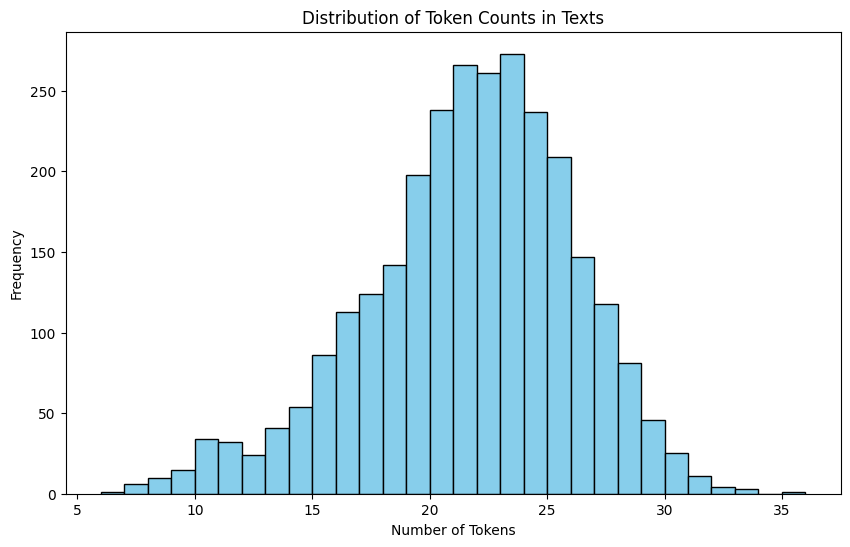

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

token_counts = train_df['text'].apply(lambda x: len(tokenizer(x, return_tensors="pt")["input_ids"][0]))

# 토큰 개수 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Token Counts in Texts")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

In [116]:
train_df['text'][53]

'코로나 r대^등교)모습'

In [137]:
for a in train70_df["ID"]:
    i = int(a.split('_')[-1])
    prompt = (
        "Noisy headline: " + text_list[i] + "Rewrite the above headline in Korean as a clear and natural-sounding full newspaper headline. It have to be full sentence not just word or category. And length of the headline is long enough to convey the main idea and indicates its category. Finally, only provide the final headline text without any notes like explanations, meta information, or additional comments."
    )
    answer = generate_answer(prompt)
    train_df2.loc[train_df['ID']==a, 'text']=answer.split('\n')[-1]
    print(train_df2.loc[train_df['ID']==a, 'text'])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


0    KT, SKT, LGU+, 3대 통신사 이용료 인상... 정기요금제로 전환, 이용자...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1    대한민국 최초의 여성 국회의장으로 선출된 이명박 전 대통령의 딸 이희수 국회의원이 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2    북한, 남북통일을 위한 자주통일의 길을 열어야 한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


4    미국 대선 앞두고 선거법 위
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


6    롯데 자이언츠 vs 광주 KIA 타이거즈 프로야구 경기 취소, 천재지변으로 인한 경...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


7    아가메즈 33득점으로 우리카드 KB손해보험을 완파, 3위 자리를 굳건히 지키다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


10    주식시장의 급등과 함께 주가가 급락하는 '고폭성' 변동이 나타나고 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


13    "맥도날드, 아이엑스에 3대 매장을 임시 폐쇄... 음식물 오염 문제로 수리 중"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


14    문재인 대통령이 민관합동위원회를 구성해 7개 사안을 해결하겠다고 밝혔다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


15    KISA 박민정 책임연구원, APTLD 이사로 선출되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


18    "개인정보 보호법 위반 의혹으로 경찰 조사받는 연예인 작가, 법정 구속 기소"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


20    추신수, 시즌 마무리 타율 0.265으로 마감...최지만은 19홈런·6도루로 시즌을 마감
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


21    KIA, 이집트와 수단·탄자니아에 판매점을 확대... 아프리카 시장 진출 속도 가속화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


22    현대차, 임원진 인원 늘려 세일즈 강화... 리드타임 개선에 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


25    "선박 폭발 사고 현장서 1명 사망, 2명 부상, 구조작업 중"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


26    SK텔레콤, 2분기 영업익 4천105억원...전년 동기 대비 1.5% 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


27    D-안과제가 통과되면 대법원 재판관 선출이 끝나게 될까?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


28    GD 감독이 2년 연속 K리그컵 우승을 차지한 가운데, 이에 앞서 열린 2023년 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


29    인천시민축구단, 35라운드 홈 경기서 충남전 승리
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


31    세계무역기구(WTO)가 발표한 2022년 무역통계에 따르면, 전 세계 무역인 1천 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


32    (스포츠) 베트남 축구의 성장 secret,
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


33    석면 방사성 물질 규제위반 5개 건물, 행정처분 받는다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


37    DCS 기술로 생산하는 인공광이 기존의 LED보다 효율이 높다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


39    LG G8 씽큐, 15일부터 예판 시작... 디스플레이 1회 무상교체 혜택 제공
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


41    LA 다저스, 류현진 4년 계약에 J.P. 호프먼 영입...다저스 2023년 시즌을...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


42    세계경제포럼(WEF)과 유럽연합(EU), 한국정부가 공동으로 주최하는 '세계경제포럼...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


44    금융위기 이후 제조업의 회복은 둔화, 산업생산량은 감소, 제조업 가동률도 낮아졌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


45    유명한 기업의 대표가 사표 제출, 특별 임원 제의로 회장직에 대한 혼란이 일고 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


46    (금융)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


47    "6월 대선 이후 6개월 만에 또 한 번 충격... 김종인 전 의원 불법 정치자금 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


48    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


49    (여객서비스 노조 파업)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


50    미국 MBA 학위 취득자 중 여성 비율은 4년 연속 40%를 넘지 못했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


52    플라스틱 쓰레기 처리업계의 현실을 들여다본
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


53    코로나19로 인한 등교 중단 등 학교 생활이 혼란스럽다, 학생·학부모·교사 모두 어...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


54    (전자신문)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


55    스마트폰 사용자들 '실시간 영상 시청'에 방해받지 않으려면 '스마트폰 속도 개선'이...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


57    (국제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


58    미국 FDA, 한·미 공동개발한 코로나19 치료제 임상 3상 본격화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


59    외교부 "아사드 정권과 평화적 해결 불가능, 오바마 대통령도 같은 견해"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


62    10만명이 넘는 시민이 참여한 대규모 집회, 정치권과 사회 각계가 주목한 '자유와 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


64    유라1, 아3, 경w, 연합회, M3 교환 합의, 1년 6개월 만에 완료
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


65    세계가 주목하는 국제사회와 한국의 대북정책, 3부작 리수임무의 성공여부가 전 세계에...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


66    (스포츠) UEFA 챔스리그
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


67    지하철 노선 개통과 함께 급증하는 승객 수에 따라 지하철 열차가 더 자주 멈추고 출...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


68    MBC가 류현진 특집 다큐를 제작, MLB 전설들에게 듣는 류현진의 이야기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


69    (에너지경제신문)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


74    월드9U 천재들의 한국전 성적을 이끌어낸 S시코 감독, 'O'오 감독과 함께 한국 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


75    특수목적회사 H6호가 금융감독원에서 52억 원 규모의 자금조달을 승인받았다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


76    북한과 미국의 대화가 재개되자 민주당과 진보정의당이 전당대회를 앞두고 대선 후보를 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


77    (법정소송
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


78    대구·경북 지역 고용유지지원금 신청이 폭발적으로 증가하고 있다. 2월과 3월 사이에...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


79    본트카 애스턴 마틴 스파가 국내 4개 판매점에서 500대 이상 생산한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


82    추신수, 시카고 경기서 2타수 무안타... 시즌 2할대포 출전 0타수 무안타
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


83    유
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


84    한국사이버미디어, 제2분기 영업이익 0원으로 감소... 전분기 대비 93% 감소
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


86    의료기관에서 사전등록이 필수인 신분증명서 사전등록 허용, 3년간 유효
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


87    수능 6년 만에 가장 높은 점수, 1,232점을 받은 학생은 누구인가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


89    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


90    서울문고, N풍그U에 인수... 전자책 전문 서점으로 전환한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


91    "한방 마사지를 느
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


92    지난해 78개 매장에서 발생한 데이터 유출 사고, 고객 2만2000여 명의 개인정보...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


94    j순형이 멀티골을 터뜨리며 우승을 이끌다, 프로축구 K리그1 1라운드 결산
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


96    구글 픽셀 6 시리즈가 출시되기 전, LG Electronics가 스마트폰 사업을 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


97    삼중공 3D 프린터로 종이면도 3D 모델로 변환해 증제하는 기술 개발 성공
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


98    올해 5월에 발표된 연구에서 외인투자자들이 한국 증권시장에 투자하는 데 있어 역외 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


101    8일 고려대와 중앙대가 경쟁하는 대학 농구 리뷰가 개막합니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


103    (교육부가 2023년 교육목표를 발표하고 학부모
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


105    (여행/관광)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


107    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


108    지자체 난개발 방지법 개정안, 국회에 발의되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


109    국회는 2차 개정 국세법이 통과되지 않아 세법 개혁이 무산되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


110    광합성 에너지 생산 공장을 개발한 세계 최초의 기업이 탄생했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


112    "단일당 추진위, 개혁보수신당과 합당 논의... 내일 첫 회의 개최"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


113    코뮤니스트 이론의 새로운 시각을 제시한 'V자 법칙'에 대한 이론가들의 논쟁과 평가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


115    (문화방송)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


116    
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


120    (이란의
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


121    손경우 장관, 제9회 아세안-유럽 협력포럼에 한국 대표단을 파견한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


122    대통령과 시도당의 입장에 대한 이해를 돕기 위한 정리...지지율이 떨어지는 고용난에...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


123    157㎞ 조성길 조성사업이 시작되자 논란이 일자, "조성사업이 독점화될까?" 우려 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


124    박광현 의원, "국회는 정치적 의혹으로부터 자유롭지 못하다"고 주장하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


125    2자배구 대K리그 7팀 구성 완료... 트레이드 논의 속도 가속화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


126    오늘부터 내일까지 전국 날씨는 맑음과 구름 많음, 오전은 쌀쌀함을 띤 후 오후부터 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


127    선두 5개 팀이 모두 승리하며 GS칼텍스, SK가 연승을 기록했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


128    중국에서 신종 코로나19가 발생한 것으로 확인되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


129    제20기 1차 외국인투자자 정관협의회 개최, 내년 투자전략 논의 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


130    애플, 아이폰 14 시리즈 출시 앞서 아이폰 13 시리즈 가격 인하 및 이벤트 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


131    학교 급식실에서 식사하는 학생들 위해 4칸짜리 분리막 설치해... 안전을 위한 조치라며
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


132    (이상 '소w
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


133    2023년 4분기 실업률 3.8%로 16년 연속 하락, 노동시장 성장세 지속
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


134    코오롱그룹 계열사 코오롱플라스틱, 1분기 연결 영업이익 58억원... 전년 동기 대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


135    대형 화장품점 'PVH'이 인수한 트리랩, 내년 1월에 브랜드 이름을 바꿔 출시할 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


136    xW리 후보의 예비후보 선언 전 사전 여론조사 결과가 누출되다, 여론조사기관에 대한...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


138    삼성전자, 빅스 개발자 1만명 돌파... 서울 첫 1위 달성
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


141    알림톡 무단 수신·발신 문제로 이용자들 불편감 고조, 법적 대응 필요성 제기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


142    박대통령, 사드 민심 청취 위해 TK 국회의원과 110분 만난다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


146    친박당 원내대표 이재오 의원, 국회 대정부질문에 앞서 기자회견 열어 "국정과제 해결...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


147    (예술/문화)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


149    분당역 인근 대형 아파트 건설과 대립하는 분당야당동 주민들 "건설 중단 요구"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


152    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


153    힐만 감독 "산체스, 15∼16일 불펜에서 대기, 시즌 후반 불펜진영의 주역 될 것"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


154    지난해보다 3.1% 감소한 74만9000여명, 1년새 외국인 입국자 수는 1만명대 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


155    수협이 공공주택 8억 원대 금융상품 출시한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


157    사법부가 발표한 판결에 따라 불구속 기소된 A씨가 무죄 판결을 받았다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


158    9대 의원 중 6명이 국회 의원 수당을 받으면서도 FU*에 자금을 지원한 의혹이 제기되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


159    중부 지방의 여성 투표율이 남성 투표율보다 낮은 현실을 고발하는 조사 결과가 나왔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


161    (교육)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


163    서울시 9월 일일 강수량이 예상보다 1.5배 많아 9일 내내 비가 내린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


168    "여행사 'AIQ'의 예약 시스템이 이상한 현상으로 고객들의 불만이 쏟아지다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


169    사채금융 규제 완화로 사채금 0.9조원 증가...오르가니즘 사채금 대비 55% 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


170    1이트삭oY, 4년 7천34만 달러 계약서에 서명... 4월 1일 영입
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


172    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


174    미국 국무장관 피오 보우건, 이란과 이스라엘 간의 중동 분쟁에 대한 우려를 표명하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


177    (문화)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


178    한미·한일 동반성장 협력, 경제위기 극복을 위한 새로운 전략 모색한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


179    한국과 일본의 연극제가 열린 가운데 한국 연극이 일본 연극을 앞섰습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


180    삼성전자 갤럭시 S8, 전 세계 고객들로부터 불만의 목소리가 들린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


181    "21세기 식량위기 대비, 과학 기술로 미래 먹거리를 찾다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


184    SK 울산 호랑이, L리엄스 영입... 프로 농구 FA시장 활발한 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


187    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


188    새누리당 원내대표 이종성 의원, 여소야대·계파 갈등에 CL 화 나며 "정치적 위기"...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


190    "2023년 대학 입학 경쟁률이 역대 최고로 치솟아...고교생 1명당 대학 1.8개...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


191    (MLB)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


192    세계일보가 집계한 최근 통계에 따르면, 2022년 6월 국내 증시가 전년 동기 대비...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


196    유니버시아드 8강 진출 실패... 한국 축구대표팀, 뮌헨에서 탈락
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


197    남북정상회담 준비가 본격화, 남북리허설 또 열린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


198    SBS 그것이 알고 싶다, 버닝썬 게이트를 수사해 보니...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


199    (증권)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


200    삼
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


202    (드라마 리뷰)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


203    지수주식 중도금융업계 성장
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


204    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


205    특징주가 주목받는 가운데 면분할로 인해 F성 전자株가 귀환 첫날에 약세를 보였다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


206    (문화생활)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


209    미국 민주당의 몽니·네이던, 한국에 방한해 박근혜 전 대통령에 대한 재판 참여를 요청했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


210    인도군이 파키스탄 영토로 진군한 데 대해 파키스탄은 강력히 반발했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


214    "문재인 대통령이 4일 국회에서 열린 국정감사에서 경제부총리와 산업통상자원부 장관을...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


215    (이전의 "폭"a!4 야o0 보러 x려든
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


216    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


217    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


218    MLB 개막전
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


219    (축구)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


221    (날씨)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


225    (보건)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


226    SK와 LG, 두산의 20승 기록에 도전하다... 후랭코프 5승으로 선두 지키다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


228    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


231    멕시코에서 발생한 지진으로 인한 화재로 30여 명이 사망한 것으로 알려졌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


233    애플, 신형 아이폰 11 시리즈 예약 시작...11월 1일 출시 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


236    당신의 선택은 정당한 승부를 보장할까? 5대 정당의 국회 의석 분할 가능성에 대한 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


237    선거 출마금액 9억 원 이상이면 투표율이 높아진다?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


238    (국방/무기)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


239    SKT, KT, LGU+, 3대 이동통신사 연동 서비스 '비전' 출시...전국 5G...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


241    (IT/보안)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


243    자베스 여대통령, 정치권에 "대화와 타협" 촉구하는 성명 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


244    "전기차 판매량이 급증하는 가운데 전기차 관련 사고가 잇따라 발생하고 있습니다."
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


245    메이저 리그 TV 플랫폼 MLB+에서 명장 바비 콕스 감독이 떠나다, 로스앤젤레스 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


246    인도와 파키스탄 간 국경 지역에서 발생한 폭발로 최소 40명 사망, 수십 명 부상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


247    코스피가 2만 5천점대에 도전하는 가운데 코스피 200주가 주목받는 이유는 무엇인가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


248    바르셀로나 이승우, 네덜란드 팀 AZ 알크마르로 임대 출전
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


249    박대통령 "후방테러" 예방을 위한 '전자위반물 등 관리·규제 등에 관한 법률' 개정 추진
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


250    북미정상회담 앞서 美, 한국과 함께 한미정상회담 성과 발표한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


256    (어린이/교육)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


257    (사회)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


261    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


264    대우조선해양, 선주가 4천199억원 규모의 LNG 운송선 2척 수주
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


266    (원제: 말 N 여h #주권 인류무형
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


267    NC 출신 왕웨이중, 메이저리그 복귀... LA 에인절스전 2이닝 무실점으로 데뷔 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


268    (국방)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


274    세계 최초로 초미세먼지로 인한 물가 상승을 공식적으로 인정한 한국, 국제 환경 협약...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


276    올해 5월 황금주말 연휴 기간 동안 해운대와 부산외곽순환로에 위치한 아파트 공영주차...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


277    NHN엔터테인먼트, 2분기 영업이익 149억원...전년 동기 대비 50% 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


278    6대국가 AI 연구개발 투자 2천억원, 종합연구개발프로그램으로 확대한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


280    대통령 호주 주석이 방한 중에 한국을 방문해 한국 정부의 부패 방지 노력에 대한 호...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


284    연천에서 영하 9.1도...오늘도 북한 전역에 강설이 이어지다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


287    8일 자정부터 화재가 발생해 6시간 동안 불타던 제주도 한 건물이 화재 진압에 성공했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


290    제주도 여행에 가기 좋은 계절, 여행자들은 제주도 여행의 가장 좋은 시기와 장소를 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


291    1분기 종합주가지수 3% 상승...스탁증권거래량 3분기 연속 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


296    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


297    "민주당과 동당의 대결, 4일 대선 후보 선출대회서 시작된다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


298    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


299    (경제) 사우디아라비아와 이란은 석유 생산량을 증가시키기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


303    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


305    경기 9일 초미세먼지 5단계, 서울·경기·강원·충남·전남·전북·경남·부산·울산·대
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


307    광주 북구에서 4대 우편취급계좌가 해킹당해 1억 원 이상의 돈이 çal렸다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


313    공사기간과 비용 1조원 넘는 EJ사업, 2년 연기된 시공일정에 따른 추가 비용 1조...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


317    탈북자들을 위한 지원을 위한 한국 정부의 노력에 대한 국가 공로훈장 수여식 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


320    장성대장 30년 만에 은퇴한 장군 W는 국군의 명예를 지켰습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


323    김어준의 뉴스공장, 청취
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


324    프린스턴 대학과 하버드 대학이 공동으로 운영하는 연구소가 해체되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


325    국회 예산결산위원회, 2023년 예산안에 3조원 규모의 신재생에너지 투자 확대안이 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


327    3일 국회에서 열린 국정감사에서 R당 의원들과 S당 의원들이 대립했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


329    김정은 북한 지도자, 3대 핵실험과 2차 과학자거리 개발 지시 받은 것으로 알려져 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


330    KT, SKT, LGU+, 세 대 통신사 중 KT가 5G폰 2세대를 단독으로 출시한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


335    "전광석화한 우승률 100%...이번 시즌도 무난한 성적을 거두는 '풀팟'의 위엄"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


338    강원CBS가 강원도 원주시에 신사옥과 선교센터 건립을 시작, 11월 완공 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


339    (금융)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


340    (Translation: Sudden increase in respiratory d...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


341    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


345    페루 여성이 광산에서 일하던 남성과 함께 납치되어 강간당한 뒤 살해된 사건, 광공사...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


346    (재난지원금)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


347    유대인에 대한 평의원 손편지 발송 당일 이스라엘-팔레스타인 충돌 발발
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


348    라모스, 2-0으로 승리한 이탈리아와의 경기에서 다시 한 번 선제골을 넣은 문대성,...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


350    
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


351    친노 지역구에 대한 특별 조사 천명, 전면 전개로 전환한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


354    금융위기 이후 13년 만에 1조원대 기업가치 상승, 삼성전자 6조원 돌파
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


356    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


358    대통령이 2차례에 걸쳐 국회에 발언한 대응에 대해 여야가 대대적으로 반발했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


362    롯데 자이언츠, 프74구 2차전 상무 야구단과 SSG 랜더스 독립 2군을 상대로 2...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


363    KAIST, 온도에 따라 변하는 스마트 입자를 개발 성공... 열역학적 자율성 기술...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


364    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


367    인공근육 기술로 사람과 닮은 나무 조각이 나왔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


368    (전자업계)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


369    N&v엔터, 이코(이코노미스트) 가입...43개국 1,000만명 이상의 경제 전문가...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


370    주택브랜드 '공작소'가 신상주택을 선보이며 입
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


376    (음악/연예)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


378    중국이 개발한 5세대 RF미사일을 사용한 핵무기 개발을 규탄하는 국회 공동의회가 열...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


379    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


381    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


382    박근혜 대통령이 국회에서 열린 연설에서 북한 54회, 핵 23회 언급하며 대화의 가...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


385    (과학/기술)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


386    엔지니어링 기업, 7년
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


389    법정에서 큰 손실을 입은 해양수산부의 대형 선박 투자 프로젝트, 법원 판결이 나왔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


391    양자암호키 전송을 위한 신뢰할 수 있는 통신망을 개발하는 연구진, 장애 시 암호키가...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


392    (과학기술)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


393    (원자력 기술)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


394    경찰이 시리아 내전 지역에서 8명의 이라크인과 1명의 영국인 등 9명의 외국인 인질...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


398    영국에서 운전면허증을 취득한 외국인 3만명이 넘는 분들께는 3월 31일까지 영주권을...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


399    NH카드 AI가 고객데이터를 불법적으로 수집한 의혹에 연루된 의혹이 제기되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


401    (북미정상회담은 6일 오전 
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


405    (자동차)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


411    이도X지구 신도시 2구역 건설을 위한 토지이용계획 변경안이 발표되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


416    SKD 문승린, 5이닝 4실점으로 C산에 패해 타선의 부담을 안고 경기에 임하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


418    촛불시민행동이 주도하는 대규모 집회가 3일 서울 종로구 세종문화회관 앞에서 열렸다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


421    (역사신문)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


423    경찰공채 논란, 신체검사 항목 3개 삭제 논의 중... 안경은 보지 못하는 시야 테...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


425    대통령 선거에서 승리한 윤석열, 18일 대선 출마 선언을 앞두고 대선 출마를 공식적...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


429    19일 밤 중부 지역은 19도까지 따뜻해졌지만 오전 9시부터는 10도까지 추워지며 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


430    총선 5개월 앞인데도 여당과 야당의 선거대책본부가 아직 정식으로 출범하지 못한 상태다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


431    LGU+ 프로야구 앱, 출시 3일 만에 10만 다운로드 돌파
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


432    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


434    (스포츠
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


436    로드맨이 주장한 가포동 F동 사건의 진실을 밝히는 데 있어 김재철 의원은 한발 앞서...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


439    경기도, 첫 번째 전자화폐 결제시스템 '활치' 도입한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


440    MjB, 4연승 달성... 0타·타점 1K씩 기록하며 1위 경쟁에 힘을 더하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


441    "제2회 한류
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


443    M국이 추진하는 대규모 군사 작전이 E국에 대한 대응으로 E국이 추진한 대규모 군사...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


445    6년간 6조원대 투자로 개발한 신도시, 1만 5천여 가구가 입주 시작합니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


446    개인투자자 8명이 3억 원대 소액투자자에게서 돈을 빼앗긴다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


447    세종시 여성 9명, 재택근무·온
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


448    코로나19 이후 2년 만에 경제가 회복되는 길에 대한 희망을 불러일으키는 신호가 나...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


449    뉴욕증시가 전일보다 4.2% 오르며 4일 연속 상승, 증시펀드의 가치도 크게 상승
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


450    한화 이글스
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


451    올 시즌 첫 홈경기에서 리버풀을 상대로 승리한 RB 라이프치히, 챔피언스리그 16강 진출
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


452    전국 추위가 돌아왔다, 전북 영암에서 최저 영하 7.8도... 2∼5cm 눈 내리다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


453    영국 장관이 브렉시트 연기안을 발표, 8월 31일로 연기되나... 반대 여론이 거세짐
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


454    (교통)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


455    박근혜 정부 국정과제 해결 위해 내각 총리회의가 어렵다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


456    "인천시청이 추진하는 대형도시철도 노선인 '인천 도시철도 2호선'의 일부 구간이 지...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


458    "U-22 축구대표팀, 아시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


459    트럼프 행정부의 무역 조치로 한국과 일본의 무역
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


460    산불피해 주택 1,000여 채가 철거되다, 화재로 인한 재건축 논란 심화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


461    경북 안동시, 제1대 노후화된 수도처리장치 교체 추진
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


462    KTQ5, m반 Ag2O 성능 개선 위한 YCg 플랫폼 개발 성공
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


466    감사원, 과학자 연구비 지원보다 공무원 퇴직금 인상에 더 많은 예산을 쓴다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


467    SK텔레콤, 유콘시스템과 함께 5G 기반 드론 ICT 솔루션 개발 협력한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


470    애플, 올해 9월에 새로운 아이폰을 출시할 예정입니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


471    중소기업에 대한 연구개발 지원을 위한 정부 예산 2조 4천억 원 확보, 과학 기술부...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


474    EMB가 양적 완화 조기 종료 가능성에 대해 검토 중, 원달 환율 하락에 대한 영향...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


475    페이스북이 왜 콘텐츠를 제한하는지 알 수 없는 상황에 페이스북 사용자들이 혼란을 겪...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


476    "예비주택 분양이 끝나갑니다, 1년 6개월 만에 1만 2천 8백 채소매각"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


477    당정 3자 간의 협상이 7일 만에 결렬된 데 따른 연말 국회 운영 방안에 대한 정부...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


479    골든스테이트가 4년 연속 NBA 우승을 차지할 수 있을까, NBA 서머리그에서 전성...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


480    국회 국정감사에서 국회 의원들의 당선인 인수인계 절차에 대한 분배 문제가 지속적으로...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


482    노벨상 수여식이 열린다... 2022년 노벨상 수상자 발표회 개막
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


483    7월 정상회의에서 북한의 핵무기 문제에 대한 국제사회의 우려가 심각해졌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


484    다저스, 6승 4패로 시즌 3위에 오르며 3점포 '러9역' 구폴록이 3점을 쏘며 승
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


485    여자축구 국가대표팀, 아시안게임 4위로 대회를 마무리하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


486    독거노인 위한 집안일 도우미 봉사활동 활발해지다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


489    한국의 주식시장, 70년 만에 첫 번째 대형 부동산 금융사들이 상장된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


490    뉴질랜드 대학에서 중국 본토 학생들에 대한 학비 인상에 대한 항의 시위가 발생했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


491    11월 국내 주식 발행액이 전년 동월 대비 60%가량 증가한 것으로 나타났다. 이중...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


493    AM치 데뷔 4년만에 첫 앨범 발표, 신인 가수들의 도전을 이끌어간 '투엑스'의 새...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


494    대형 서점들, 전자책 판매 부진에 대한 책임론에 부딪힌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


495    아스널, 20년 만에 프리미어리그 우승 좌절...맨시티 리버풀에 패해 2위로 밀려난다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


496    조소앙이 쓴 독립운동 평전 '유방'이 재출간, 역사가의 시각으로 본 일제강점기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


497    애플, 한국에 초청된 70명 중 7명만 참석... 김영란법으로 인해 출국 거부당한 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


498    베트셀러 CEO, 6주째 연봉 0원 받는가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


499    피아노 연주자 피유 로이, 10일 서울 공연 취소... 건강 악화로 인한 휴양
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


500    군사 작전으로 인해 7명 사망, 8명 부상, 계곡에서 군인 1명 실종, 군사 작전 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


502    국회가 여당과 야당이 대립하는 가운데 1일부터 4일까지 열리는 임시국회에서 대립이 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


503    김우재 국회의원, 섬진강댐 방문해 수자원 관리 현장 살펴본다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


505    2018년 pWd 바르셀로나에서 열리는 갤럭시S9 발표회 앞서 5천여명이 몰려다니는...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


509    U2가 바르셀로나에서 열리는 '지G3S' 콘서트에 참여한다고 발표, 팬들 열광
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


510    LG 3
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


511    신한금융그룹의 자회사
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


512    or
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


514    (건설/재난)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


515    청와대 대북 선전
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


516    2023학년도 2학기 게Z판 편입생 모집 안내, 카톡으로 지원 접수 진행합니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


518    KT, SKT, LGU+, 3대 통신사 실시간 게임 서비스 무실점율 2위 3위 1위...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


520    통신업계가 위기감을 느끼며 위기대책을 마련한다는
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


521    리브라운 미국 상원 의장, 1일부터 5일까지 일본 방문해 경제 협력 강화 방안 논의한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


523    LG G6, 갤럭시 S8을 제치고 스마트폰 화질 1위에 등극했습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


524    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


525    북한, 한국에 경고하고 중국에 압박하는 대북정책이 어긋나는 데다 미국의 강경 대북정...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


526    오마르 알 사드가 이집트에 대한 방위 협력을 강화할 것이라는 미국의 발표에 대한 반...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


527    롯데건설, 폐수슬러지 건조기술 환경성 인증 획득... 녹색기술 인증서 취득 최초의 건설사
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


528    북한의 핵무기 문제는 한미간의 관계에 큰 영향을 미칠 수
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


531    부산 교육청, 7개 교육시설에서 식중독 등 19건 발생, 육아보조원 8명 감염
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


532    아베 총리가 일본과 대화한 결과, 한국은 일본의 역사교과서 문제에 대한 주장을 받아...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


533    0강 검진 결과 받은 민우아재 의원, 건강 상태에 대한 의심을 풀었다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


534    서울시 공급하는 공동주택 관리 우수지표에 '서울 텐 힐 1단지'가 선정되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


535    아마존의 자회사 인피니티 테크놀로지스, 전자제품의 전자파 안전성 문제로 미국 연방거...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


537    유엔이 이라크에 대한 공습으로 1일간 100명 이상의 민간인이 사망했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


538    이란이 미국 등 서방 국가에 대한 제재를 피하기 위해 대규모 군사 훈련을 시작한 가...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


539    4명이 사망한 대형 버스 추돌 사고, 경찰이 조사 중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


540    LG G6 예약판매 시작, 액정 무상 수리 등 45만 원 혜택 제공
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


541    국문협, 우상화에 대한 문제를 제기하는 'D-임훈'의 글에 대한 논란이 불거진 가운...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


546    세계 석유 가격이 8달러까지 오르며 연속 4년 만에 최고치를 기록했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


547    (농식품)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


548    사드
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


550    북한 조선중앙통신이 보도한 북한 영토에서 드론이 피격된 사고가 발생했다고 밝혔다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


551    (국방부, 한미일일자리, 호주, 뉴질랜드
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


552    경기 경제가 회계사들의 이익을 상반하는 양상 나타내다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


554    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


556    아프리카TV, 엔터소사이어티와 MIU와의 파트너십을 통해 아프리카 시장 공략 강화한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


557    (과학)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


559    문재인 대통령과 김정은 북한 지도자가 27일 평양에서 열린 정상회담에서 4차 핵실험...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


560    교황청 직원 중 성범죄자 증가... 교황청 내 성범죄 방지 지침은 존재하나 실질적 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


561    우주에서 발견된 행성 중 하나인 Uterworld S가 물로 덮여 있는 것으로 밝혀...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


563    부산 해운대구 대성로 붕괴 사고, 2명 사망 7명 부상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


564    "엑스엘비(엑스엠) 선수가 폭행 혐의로 경찰 조사 받다, 8일 만에 구단에서 제명"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


565    신종 암 치료제 개발, 이저스 연구소 "Dr. X의 연구 성과" 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


566    "기상청, 내일부터 3일간 강한 비·빗방울로 오는 폭우 경고, 전국 곳곳에 10cm...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


567    코로나19 위기 이후 달러화가 강세로 반전한 이유는 무엇인가? 달러선물 시장의 전망...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


568    학술지 논문이 학문적 가치보다 인기가 많아 학계 논란이 일고 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


570    고려대학교 교수가 논문 위작 의혹을 받고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


571    W지간의 T자< 데리! >를 읽고, 포퓰리즘의 주인공이 누구인지 찾아본다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


572    특검 이화2대 및 관계자 F사무실·4택(0여자+1남자) 색출한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


573    LG전자, 2018년형 실속형 스마트폰 K 시리즈 공식 발표, 가격과 출시일도 함께 공개
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


574    참석자와 인사들이 모인 가운데, 국회 법제사법위원회 소속 안희정 의원이 국회 의원 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


577    2022년 그래픽 주식 1인당 평균 보유 종목 수는 4.27개로 줄어들었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


578    국민의당 당내 성추문 의혹으로 당직자 3명 자진사퇴, 당 지도부도 물의에 휩싸여
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


579    영국의 레크시Q 의원, 혼성 결혼에 대한 입장 제시 "[합의는 아직 멀었지만] 법적...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


580    러시아 대통령 푸틴, 테러범에 대한 법 집행 강화 법안에 서명
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


581    (기상)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


582    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


583    FTT 엔진 부품 판매 및 e-Equipment 공급 시장 6조 원 규모로 성장할 전망
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


585    구글, 인공지능 질문과 답변 서비스 Q&A AI가 어떻게 진
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


586    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


588    호주에서 한국인 이민자들이 받는 폭력과 차별에 대한 우려가 높아지고 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


590    미국-중국 무역전쟁 영향으로 환율 불안이 고조되며 원화는 1,300원대에 접근하는 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


591    (중국경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


592    "6년 만에 재개된 '이재명-윤석열' 대결, 4일 서울 여의도에서 열리는 TV 토론...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


593    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


595    (국제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


596    세계 집값 10년간 50% 이상 상승... 한국 집값 30년간 3배 이상 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


597    미국이 북한 핵합의 체결을 막을 것이라는 우려에 따라 세계가 긴장한 가운데, 미국과...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


600    한일 간의 갈등이 한 순간에 폭발한 느낌이 들었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


601      LA 다저스 강정호, 뉴욕 메츠 이정후, 샌프
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


602    LA총영사관, UCLA·USC 한인학생회와 취업정보 공유 및 지원 협력 협약 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


604    한국여자축구대표팀, 아시안컵 한일전 4위 결정전 무승부...첫 우승 꿈도 깨어지지 않다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


606    청와대 김기식 비서실장 논문 논란, 정면 돌파 태세 9선 관위 '권해석' 결과가 A...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


608    SK그룹, 오스플7 제조 인프라 구축 위해 255억 원 규모의 정부 지원 계약 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


609    EBS 청년O래대학생 기자단이 시판 제1호를 내놨다, 청년들의 시각으로 보는 뉴스 세상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


610    아파거나 월급 못받으면 Y축은행의 대출이자 부담이 될 수 있습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


611    강원도교육청과 전교조가 타결한 8개 학교의 노조 합법화 문제로 인해 교육부가 발표한...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


612    삼성전자, 전년 동기보다 매출액 25.7% 증가... 영업이익률도 12.1%로 최고...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


613    LG전자, 미국에서 G6폰 출시와 함께 구글 홈 스피커 무료 제공한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


614    샐리 캡은 4쿼터 Y에 1억 원을 넘는 금액으로 인수되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


615    티맥스, 인공지능 기술로 생활 혁신을 선도한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


617    (사회/정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


618    미국 해병대 장교와 목사, 이란으로 파견된 미군 중 한 명이 사망한 뒤 이란에서 7...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


620    북부 지방에서 집중호우주의보 발령, 1시간 내에 해제될 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


622    시안 게임에서 한국 선수들이 우승한 여농 5인조가 한국을 대표해 금메달을 획득했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


624    "법원, '실종된 실장' 사망사건 관련 재판서 실종된 실장 부인에 대한 증인 신원 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


625    손흥민, 토트넘이 챔스 8강에 진출한 뒤 첫 번째 경기에서 레알 마드리드와의 원정 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


626    이란에서 반정부 시위가 확산되며 7명이 사망, 771명이 부상했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


628    바르셀로나, 빌바오와의 경기에서 승리하며 세군다 디비시온에서 1위 자리를 유지한 그...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


629    잭슨, MLB 역대 최다 기록에 근접한 14번째 유니폼 입었다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


631    원내8%의원들이 국회 의장 선거에 대한 협의를 시작했습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


632    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


633    경마장에서 발생한 사고로 8명이 사망한 뒤 경마장의 안전성에 대한 논란이 불거지는 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


635    (건설/건강/사회)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


636    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


638    IoT 기술을 활용한 도시 쓰레기통 관리 시스템 도입, 효과적인 쓰레기 수거와 정비...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


639    중국이 입막음 기술로 2세대 반도체와 IBM의 7나노미터 공정 기술을 결합한 3세대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


641    (북한, 국제 관계)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


642    한강에서 3살 아동이 사망한 사건이 발생, 사회적 논란이 일고 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


643    한국 Curling 대표팀 림픽 예선
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


646    (IT/과학)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


647    무급휴가·휴직자 3년 이상 근무해도 고용보험 지원받을 수 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


648    신
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


649    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


650    소상공인 위한 LG U+와 키지, 신용카드 결제 서비스 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


654    북한 김정은 러시아 방문 9월 중순 예상, 하반기 첫 외교 행보로 주목받아
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


655    (Translation note: The headline is written in ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


656    소설가 이소설이 쓴 '0아지 3.G.I스'가 출간, 문학계에 새로운 시선이 열린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


657    iOS 11이 출시되면서 애플이 증강현실 기술을 본
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


659    불법 판매로 6억원대 손실...갤럭시 S9 매장서 불법 판매 의혹 제기된 화웨이 매...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


664    현대모비스, 90일 내 4만억원 투자로 경영 강화한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


665    33대 국회 임기 중반, 청와대-국회 갈등이 고조되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


667    (법정/정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


670    (통신업계)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


671    오늘 2만 2000여 명의 학생이 등교하는 4개교, 코로나19 예방을 위한 방역 조...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


672    스피싱범 2명 검거, 1억원 이상의 피해액 발생한 사이버 범죄 수사 결과 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


674    네이버와 미국 유튜브 11인 선정, '네이버 뮤직 어워드' 2회 개최, 음악계 이목 집중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


675    (금융)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


678    디지털 콘텐츠를 상품으로 만드는 그라리타, 미디어 산업의 새로운 패러다임을 열다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


679    21일 프로농구 6라운드 5경기에 대한 결과, 6승 1패를 기록한 팀이 4위로 올라섰다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


682    사우디아라비아와 UAE가 지원하는 예멘 정부군이 이란 지지하는 혁명군을 상대로 승리...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


683    이종욱이 2홈런으로 대활약, kt가 SK에게 2-1로 역전승을 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


685    25일 남성 2명이 차량을 운전하던 광객과 충돌해 1명이 사망, 3명이 부상했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


690    대신증권, 데드케미칼에 자사주 9.4% 소각해 1.3조원 매각
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


691    or
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


693    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


694    (보건)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


695    국민의 신용정보 유출로 인한 D-인인증서 위협 급증, 정부와 금융권 긴급 대응에 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


696    "국민의�
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


698    1년 만에 돌아온 소설가 이정명, 신작 '죽지 않는다' 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


700    (원제: Galaxy Z Flip이 세계에서 가장 많이 팔린 스마트폰이 아니다)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


701    (교육)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


703    세프의 대국적 기술기업 구글 4대 수뇌부가 서울 집결, 알파벳 CEO들 회의 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


704    염기훈, 부상으로 결장한 데다 멀티골을 넣은 활약에도 불구하고 팀은 패배했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


706    전몰군인 추모제 9일 열려, 화재로 사망한 희생자 추모 행사도 함께 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


707    제3회 경찰의 날 기념식 개최 경찰의 헌
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


710    박근혜 대통령, 문재인 후보와의 대선 공천을 선언한 박원순 서울시장 등 4명이 공감...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


711    심청이의 기원전 1,000년 전의 전설이 현대판타지로 재탄생한 '심청전'이 대중의 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


714    (금융)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


715    YTNq사, 천원회 7명이 늘어난다...회장실장직 보장제도 도입
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


717    세계에서 가장 큰 크레인 1호가 국내에 도착, 기중기 시장이 새로운 도약을 시작한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


719    프로농구 선수 윤호영 선수, 수술비 6500만원 지원받아 의료비 부담 완화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


720    김관택 국회의원, 연동형 L거의안에 대한 의원 의견서 제출... "의원 의견서 제출...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


721    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


722    
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


723    "2년 전 축구 경기 부정 행위 의혹으로 구속된 전 축구 선수 A가 오늘 법정에서 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


724    1억원대 금융그룹의 차기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


726    삼성 노트7 판매량 500만대 돌파...이미 판매된 노트7의 후속 기대감 높아지나
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


728    SK텔레콤, 인텔과 함께 5G 기반 자율주행차 기술 개발 협약 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


729    32일간의 대규모 여행객 증가로 국내 관광업이 크게 영향을 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


730    서초구, 자치분권 추진에 앞장서서 지역개발 총괄계획 수립한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


732    김영춘 전 경남지사가 첫 당선인으로서 경상남도지사에 취임했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


733    19일 연속 로또 5등 당첨자 없지만 3등 1명이 나타나다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


735    "QL투 2분간 사상 최다 7명 사망, 2명 부상"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


736    문 대통령 국정지지도 74%로 급상승...지난주보다 3%포인트 오른다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


738    문재인 대통령, 북미간 평화협정과 수교를 위한 노력에 성과를 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


739    세계 8천만 명이 장애를 겪고 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


740    "이번 주말 개봉하는 '리: 리와 모노'가 대박을 치는가? '리: 리와 모노'가 대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


741    SK텔레콤, 인공지능 기술과 산업의 미래를 열어가는 콘퍼런스 'ai.x 2019' 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


742    에스티.이, 16억4천만 달러 규모의 새로운 디스플레이 제조장비를 도입한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


743    퀸즈버그 방송국 아나운서 성추행 의혹 해소, 뉴욕 방송위원회 권고안 승인
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


744    지수 42% 상승, 증시가 다시 살아난다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


745    (주택 및 도시 planning
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


747    2차대전 대표사상 평화의 길에 큰 한 걸음... 노벨 평화상 수상자 2명, 노벨 문...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


748    10대와 20대 청년들이 하루 평균 4
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


749    (야구)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


751    미국 NBA 팀이 한국 배구 선수들을 영입해 팀 성과 향상에 기대고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


752    
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


755    (야구)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


756    국민의힘 개혁론과 민생정책에 대한 국민의 반응은 어떠한가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


757    "박스오피스 1위는 '엑스맨'...영화관에 다시 돌아온 관객들"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


759    해외령지구 아나 노조 회원들, 정부와 노사 간의 합의가 없는 점을 지적하며 농성 중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


760    제1위 타격왕 이병헌, 97홈런으로 마무리...역대 3위 기록 달성
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


761    미국이 이란에 대한 제재를 완화하는 대신, 이란이 미국과 이스라엘에 대한 공격을 중...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


763    국회 헌법개정안이 통과되자 대통령이 헌법 제정에 서명한다는 예상과 달리, 헌법 제정...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


765    삼성 갤럭시 S
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


766    LG n20, 스마트폰 시장에서 가장 인기 있는 모델 중 하나로 선정되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


767    지난해 9월에 최고치를 기록한 주식시장, 올해도 3분기 전년 대비 9% 이상 상승할...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


768    고속도로에서 발생한 충돌 사고로 8명이 사망, 20여 명이 부상했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


769    (IT/모바일)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


770    삼성전자, 갤럭시 S4 LTE-A 모델 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


771    "대형 재난재해 발생 가능성에 대한 정부의 대비책 논의가 본격화되면서 재난재해 대응...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


772    3주간 사회서비스부 직원 1급 사무관 등 우수 부서장 3명 선정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


775    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


781    PCW5대 윈도우 OS 점유율 최초로 90% 넘어섰다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


782    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


783    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


784    토르: 레전드 러시 - 새로운 애니메이션 영화가 넷플릭스에서 곧 공개됩니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


785    분양 시장 7개월 연속 상승...지난달 3만268
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


786    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


787    (여행)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


789    중부지방 9일부터 장마가 시작되며 10일부터 비가 내리기 시작할 것으로 예보되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


791    미국 워싱턴 D.C.에서 열린 IMF-월드แบ 은행 정기총회에서 한국 대표단이 미국...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


794    (전자/가전)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


796    말라리아 유행으로 인한 위기 상황이 심화되고 있는 스리랑카에서 3월 9일부터 3월 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


797    독일과 한국이 협력해 개발한 신종 코로나바이러스 감염증 치료제, 74%의 치료 효과...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


800    세종9호 단체 참사, KBS·MBC 방송사 책임자 8명 공개 사과
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


803    김지제, 19득점으로 깜짝 G5 승리... 현대캐피탈, KBO리그 5연승 달성
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


804    유엔 6개국이 북한을 블랙리스트에 올렸다... 북한 6개 직무 대사 첫 번째로 제재...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


806    (건강)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


807    정의장, 인도·카자흐스탄·네덜란드 방문으로 아시아·유럽·아프리카 3대대륙 9개국
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


808    러시아 우크라이나 전쟁으로 전 세계 반도체 공급망 혼란...4개국 반도체 공급 중단
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


809    라늄 저장소에서 핵물질 유출 사고 발생, 미국 정부 조사 착수
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


812    (식품/환경)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


813    아르헨티나, 리오 플라타에서 열린 남미 축구선수권대회에서 멕시코를 격파... 링컨 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


814    8개 경기권 시내버스 노선에 자율주행버스 도입... 2025년부터 본격 시범운행 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


815    네이버 투Q j호 스>트업, 배달앱·커머스 플랫폼 개발에 집중한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


816    스피드 전환에 대한 국정자문위원회 출범, 경제위기 대비책 마련한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


819    소음이 심한 공장 근처 주택들에 대한 정부의 대책은 아직 미흡하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


820    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


821    (정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


822    AS모!코 TV, 팔카오+V 관련 혐의로 2억 원 상당의 광고계약 취소 처분 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


823    일본의 대형 투자사 Bx8, 한국에 1조원 규모 투자 계획 발표... 마리오 본사와...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


824    화이트 그래핀의 대면적 합성 성공, 산업적 활용 가능성 높아져
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


825    북한과 남한의 협력기금 9조178억 원, 2016년보다 855억 원 많아
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


826    "신한은행, 2년 연속 우수기업으로 선정되다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


827    이탈리아와 아프리카의 앞날을 열어가는 '신대륙 연결' 프로젝트, 양국 관계 새 시대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


828    외교부 내부 분쟁에 대한 화답은 없지만 이란 방문 KO, 사적 해법은 안된다고 말한...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


829    DL네이버가 2위에 오른 가수 A용의 신곡 '간'이 큰 성공을 거두며 SCi앱 차트...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


830    8개국이 참가하는 매드 맥스 8 경쟁에서 한국이 우승했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


831    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


833    브리검 김성호가 주도한 국회 예산심의회에서 사사구 5개가 연이어 통과되자 반발이 커...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


835    (스포츠/미디어)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


836    국토교통부, 무인자동차 및 드론 개발에 1조100억 원 투자한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


837    삼성그룹 이재용 부회장 영장 기각, 재판부 "증거 부족" 이유로 판결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


838    3대 도시의 수도원정 수준은 어땠나?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


840    13 번째 P가 출현한 클래식 음악의 선율로 물드는 13 번째 P의 매력은 무엇인가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


842    프랑스가 이란을 상대로 발사한 랜덤탄도 미사일 9발이 모두 이란에 도착했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


844    내일 영하 1도까지 추위가 이어질 전망, 기상청 "하루 평균기온 0도대"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


845    내년 8월 6일부터 10일까지 서울에서 열리는 세계 박람회에 한국이 8%의 전시 면...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


846    9월 9일 경상남도에 난민 수용 단지를 군사용 토지에 배치할 계획이다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


847    대통령이 핵무기 개발에 대한 정의를 명확히 밝히지 못한 채로 탄핵 절차를 시작한 데...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


848    러시아가 석유·가스 분야에서 세계 2위의 석유 회사인 에크본과 합병을 추진 중이다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


849    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


850    (tech)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


851    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


852    트럼프 대통령이 서울을 방문해 한미일 3국 정상회담을 개최한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


853    KT, AI TV 기가지니2 출시... 더 작고 더 간결해진
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


854    정부, 실손보험료 인하에 대한 의견을 듣고 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


856    유럽연합이 터키에 대한 압박을 강화하는 가운데, 하키 우승을 향한 터키의 꿈이 위협...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


858    한국 마이크로소프트, 윈도10 IoT 에디션 출시... 기업용 시장 공략 본격 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


859    (원제: 7이 들어올 때 b는 W2
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


860    애플의 자회사 애플 시리우스가 KT와 함께 5G 네트워크를 구축해 2025년까지 2...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


864    구글과 페이스북, 중국 정부의 금융 규제에 따라 서비스를 일부 제한한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


865    (전문가들은 북
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


866    8월 15일 미국시간, 마이크로소프트가 인수한 게임 개발사 ZeniMax Media...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


867    (Translation: "Over 10,000 people use Incheon ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


869    해수욕장에서 가장
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


871    중국 관영 매체 "중국 시위는 반체제 세력의 음모"라며 서브웨이 개막전 중단을 지지했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


872    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


873    대한항공, 6월 3일부터 9
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


874    한국기자8년 창립 15주년을 맞아 기념행사를 개최합니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


875    세계적인 가수 세븐, 10일 서울에서 열리는 '2023 MBC 가요대제전'서 무대 올린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


876    충북에서 맑은 날씨가 이어지다가 밤부터 구름이 몰아와 내일 낮 최고기온 17도에 그친다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


877    오늘날자재시장에서 급격한 가격 변동이 일어나고 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


879    (세계인권대회)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


883    지니 앱이 교통 앱 1위, 택시 앱은 카오가 1위다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


885    베를린의 하모니 오케스트라, 한반도 평화와 화합을 기원하는 음악회 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


887    카이아나 에너지, 분기별 매출 1조 원 돌파... 전년 대비 30% 성장
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


888    삼성전자, 모바일 결제 시장 1위에 등극... 간편결제 서비스 '삼성페이'가 주역
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


891    도시가 국제환경협약에 따라 기후변화 대응 전략을 제출한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


892    대구사회복지재단에 5억원 기부, 사회복지사업 확대 나선 한화그룹
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


893    (문화)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


894    이탈리아 대의원, Conte 정부와 5당 연정 승인... 정당 구성원에게 의회 의석 부여
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


896    금융시장의 불안이 가시권으로 확산되면서 주식시장도 급격한 변동을 보이며 560%대 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


898    LLG 스톤잭 드레인키, 1억 달러 이상의 계약서에 서명했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


899    x정법상 부부살해 혐의로 기소된 남편이 재판에서 무죄 판결을 받았다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


900    북한, 남한과 갈라진 땅에 첫 번째 지하터널을 완공했다고 주장한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


902    원숭이 TV 프로그램에 출연한 '원숭이'가 실제 원숭이인지 의심스러운 경쟁 프로그램...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


903    삼성 라이온즈, 58연패의 쓴맛을 보게 한 결승타로 결국 4위로 시즌을 마감한 KB...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


906    북한 김정은 당 대회에서 함경북도· 황해북도· 함경남도· 황해남도 대표로 선출되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


909    메이저 리그 베이스볼 뉴욕 양키스 감독 조지 스타인브링거, 시즌 중반 이후 첫 패배...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


912    "지하철 노이즈 감소 기술이 개발된 가운데, 기존 노이즈 감소 장치가 효과적으로 작...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


916    9월 9일 서울시내 6개 구에서 77명이 확진된 코로나19 6차 유행의 영향으로 9...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


917    약물량 1만 8천개에 33명이 지원한 미안 강남 포스트, 경쟁률 33대1
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


918    미스터 샤인 S프로, 주요 인물들 납부금 문제로 법적 조치 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


922    (금융)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


923    (보건)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


924    북한, 6일 핵실험을 개최할 것이라는 미국의 경고에도 불구하고 5일 8번째 핵실험을...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


925    금융투자자들이 주목한 Po뱅크의 412CE 전 5월 주식시장 성과가 좋았습니다. 신...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


929    난해 오비 은행이 신용대출 금리 3.2%를 낮추고 2천원 이하의 수수료를 부과하지 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


930    추경수 3경기 연속 무안타, 타율 0.200으로 시즌 최악 기록을 경신했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


931    文대통령, 지도부와 2도지사·5원장 등이 참석한 대국민 브리핑에서 청와대와 국회 소...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


934    코스피 1,900선 돌파...장중 상승세 유지, 외국인 매수 주도
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


935    북한, 9월 1일부터 9월 30일까지 9개 주에서 대규모 군사 훈련을 개최한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


936    Z훈클럽 신영기, C금 지원에 B수 수혜자로 등극한 Smj, 2023년 1분기 성적...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


939    천은사에서 입장료를 폐지하는 업무가 진행 중이다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


946    (과학)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


947    "독일에서 한국어를 배우는 학생들, 코로나19로 인해 온라인으로 전환"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


949    중동에서 중요한 역할을 하는 푸즈이사우디아라비아와 이란 모두 미국과 좋은 관계를 유...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


950    4트리트먼트의 효과를 증명한 연구 결과, M원 공식 요가 프로그램이 인기가 많아지고...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


952    한국당, 민주당의 중점법안에 대한 반대 의견을 내놓고 고심 중이다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


957    (스포츠/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


958    러시아-북한 정상회담 공식 제안, 푸틴과 김정은 만날 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


960    국회, 노동자 52시간 근무제 도입 법안 통과... 노조와 정부가 합의한 내용 반영
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


961    (보건)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


962    (교육)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


963    (교통)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


964    4골 중 1골은 C반에서 30분 만에 기록한 기적의 골, "Q00골 h시"가 또 한...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


966    박대통령 "조선일보 창간 120년 만에 창업국민의 기대에 부응할 역할해야 한다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


967    제5회 전라북도 문학상 수상작 발표, 신인 작가의 등단을 알리는 셔플이 수상작으로 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


968    시리즈 6차전 선발로 켈리와 용찬이 대결한다, 두산과 SK가 3일 만에 결승에 오른다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


969    아르헨티나 축구 국가대표팀이 9월 23일 열리는 브라질과의 월드컵 예선 경기에서 승...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


970    R화감독이 지휘하는 오케스트라, 타지 옌이 작곡한 교향곡을 연주합니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


972    미국과 13위로 드디어 1라운드 탈락을 피한 K리그, 6승 7패로 종전서 3위 달성
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


973    KT가 운영하는 공유 앱 'Y데이' 가입자 수 1일 만에 100만 명 돌파
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


974    화재로 인한 집이 불타는 사고가 빈번해지자, 정부는 집화재 예방을 위한 대책을 발표...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


975    정의당 울산시당이 6·4 지방선거 후보를 공식 발표했습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


976    러시아 99자 배구 국가대표팀 D조 경기 코치 Lxunov, 결승진출에 실패한 뒤 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


977    코로나19 여파로 인한 물가상승세가 가중되고 있는 가운데, 정부가 이번 달 말까지 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


979    (스포츠/자동차)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


980    독일 축구 대표팀, 월드컵 8강전에서 패해 탈락...스페인과 1-1 무승부, 크로아...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


981    음성·이미지 인식 기술이 본격 적용되는 시대, AI 기술로 보다 정확한 음성·이미지...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


982    SK텔레콤, 갤럭시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


983    (경제·정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


984    (여자축구)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


985    2026년부터 민간 우주개발시대 열어 달착륙은 2030년 목표로 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


987    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


988    문재인 대통령 "힘을 합쳐 9월 18일 총선에서 승리해야" 다짐...국민의힘, 정의...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


989    6일 9시 무렵 6천명이 넘는 군중이 집회장에 몰려들어 경찰과 충돌했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


991    국회에서 열린 대국민 연설에서 "고개숙여 듣고 사과하라"는 말에 논란이 일자, 야당...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


992    (주택연
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


993    김동윤 의원, 거제시의회 개혁부터 시작하는 바른정당의 지역정치 개혁 방안 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


994    유럽과 미국의 대형 통신사들이 공동으로 개발한 6G 기술이 국내에 도입되기 시작했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


996    LG화학 광주전남본부 소유 토지 1만9천㎡에 달하는 부지 매각 결정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


997    동아시아 지역에서 확산되는 무신론과 무신앙의 문제점에 대한 국제 공동의 관심이 높아...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


998    이스라엘 야당이 야권 연대 성사에 대한 희망을 내비친다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


999    SKT, 실시간 재난구조 시스템 개발 성공... 재난 상황에 즉시 대응 가능
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1000    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1001    24일 만연산 일대에서 산불이 발생해 8개소의 임야와 숲이 불타고 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1002    삼성전자 3사 갤럭시 S21Z 5G 모델 출시, 1%대 소비자 매출 1위 달성
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1004    메시, PSG와의 결승전에서 우승한 바르셀로나, UEFA 챔피언스리그 우승을 차지했...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1007    (철도)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1008    미국과 멕시코가 7년 만에 다시 시작하는 NAFTA 협상, 2차 회의서 주요 쟁점 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1009    보통신산업진흥원이 선정한 7대 방송통신산업 발전 전략 중 하나인 '3G 무선 인터넷...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1010    손민규 감독이 이끄는 K리그2의 성남 FC가 4-1로 승리하며 3연승을 달성했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1012    전국 네티즌들 사이에 불거진 네티즌들 사이에 불거진 '네티즌 뒷돈' 논란에 대한 검
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1013    카자흐스탄, 러시아와 첨단 농업 시스템 협력 협약 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1014    질병관리본부, 서울 재난상황에 대한 외신 5개국 3개 방송사 취재 여건을 만든다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1015    오스트리아 우파당이 대선에서 승리한데다, 오스트리아의 유럽연합 탈퇴를 주장하는 국민...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1016    오바마 대통령의 방한이 성공적으로 마무리된 가운데, 미국과 한국의 경제 협력은 대규...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1018    5개 산에 있는 초등학생 3명이 실종되어 9일 만에 구조되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1019    애틀란타에서 발생한 1차 지진으로 인한 재해 상황은 점점 더 악화되고 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1020    지방공무원 승진 136명, 2년 연속 3,300명이
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1021    더불어민주당 8명의 국회의원이 '사학재단의 재정운용 문제'에 대한 국회 특별조사위원...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1022    직장인들이 직장 내 노이즈로 인해 업무를 수행하기 어려워하는 문제가 심각한데, 최근...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1023    코스닥 개미 투자자들 "시장 혼란에 시무룩한 표정"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1024    "신간 'x^0' 출간, 4일 만에 매진... 작가의 명성 한 번 더 증명했다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1025    도쿄행 첫 관문 인공위성 '아키츠시마'가 성공적으로 발사되었습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1026    아르세날 감독 벵거 감염으로 결장, 유베와의 경기 취소될 가능성 높아져
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1028    승우가 AC 베이징과 4년 계약, 올 시즌부터 뛰게 된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1029    윤 대통령, 베트남에서 열리는 국제 에너지 회의에 참석해 경제협력 강화 방안 논의한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1033    삼성전자, Galaxy Z Flip4와 Galaxy Z Fold4가 출시되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1034    제주 동부 지역에 강풍이 몰아치며 폭염이 이어지는 가운데 오늘도 제주 남쪽 해안 일...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1035    아시아선수권대회
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1036    스웨덴의 노벨 평화상 수상자들이 한국에 초청된 가운데, 북한의 핵실험과 관련해 국제...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1037    (노동/경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1038    전자파 문제로 인해 온종일 차량이 스마트폰 사용을 금지한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1040    2세로스페르스K가 아르헨티나의 인플레이션을 부인한 데 대한 반발로 주가가 폭락한 가...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1041    (지자체개발부문)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1042    프리시즌 야구 시범 경기가 시작되었습니다. 병신호 이형준이 홈런포를 치며 이끌었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1043    파주시민상 수상자로 선정된 이재명 의원, 지역발전 공로 인정받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1044    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1045    인공신경망 기술로 뇌신경을 재편성하는 연구 성공, 치매 치료에 새로운 가능성 열린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1047    정무부총리 후보자 인사청문회서 국회 의원들이 정무부총리 후보자의 청문회를 통해 데일...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1049    금융투자자 1만명이 참여한 '펀드 입찰 이벤트' 결과 발표, 1위 펀드의 성과는?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1051    데이터 활용을 위한 IT 기술과 규제 개선 방안을 모색하는 정부-업계 협의회 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1052    남성 노동자 1명 사망, 공장서 화재 발생, 10여 명 부상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1053    1세 그룹의 화려한 그래픽 디자인 01년 주기 전시회 열려
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1054    D5기자가 선정한 올해의 10대 뉴스와 이슈는?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1055    세계무역센터에서 발생한 화재로 5명 사망, 18명 부상, 구조작업 끝나다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1058    신간 2편 출간, 문학과 음악을 주제로 한 신작이 눈길을 끌고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1059    기업은행, 대구 시내 말골목 등 지역경제 활성화 위해 1조원 지원한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1061    세계의 가장 큰 합창단, 2만 명이 함께하는 대규모 합창회, 서울에서 열려
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1062    LG화학, 안정적이고 안정적인 사업을 강조하며 강도 있는 대책 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1063    삼성전자, 5K QLED TV와 갤럭시 S 시리즈가 함께하는 2023년 3월 30일...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1064    네이버·LGU, 지체 장애인에게 AI스피커와 음원 이용권 전달해 장애인 문화생활 지원한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1065    국회 예산결산위원회, 외교안보수석 업무보고를 위한 심의를 미루다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1066    3대 대기업 그룹이 감당할 수 없는 부채로 인해 위기상황에 처한 가운데, 정부가 대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1068    (국제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1069    뉴욕 영화제에서 화제
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1070    화천에서 열린 산천어축제, 100만 명이 참여해 목돈을 벌어간다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1072    갤럭시S8의 후속 모델, 갤럭시S8V가 출시될지 여부에 대한 소식이 나왔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1073    전교조, 전자교과서 교체에 대한 의견을 모으고 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1074    문대통령, 용산 이태원 참사에 대한 국민의 관심을 높여달라며 애도와 위로를 표명했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1078    (의약품법 위반
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1080    2018-2019 시즌 여자농구 KB국민은행 스타즈의 경기 티켓 판매가 11일부터 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1081    "2023년 6월 1일부터 도로변 음소거 구역이 확대되며 교통 혼잡이 심화할 것으로...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1082    남원시민 "지구대 이전은 원래 설렁설렁" 된 것 같다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1084    KB 스토스, 올 시즌 첫 팬 투표에서 1위로 등극... 농구팬들의 뜨거운 사랑을 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1085    "4일간 연속 추락사고로 1명 사망, 1명 뼈 골절, 1명 부상"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1086    Y_인의 시선으로 본 제2의 한국전쟁: 북미군의 충돌과 그 이후의 세계
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1088    "미생제품의 우수성을 세계에 알린다, 제 2회 미생 국제품질경진대회 개최"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1089    트라이네이션컵에서 라오스와의 1
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1091    이화여자대학교 클럽회장 선거에서 이규원 K(S 아나운서) 후보가 당선되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1092    이번 시즌 266번째 엘클라시코, 호날두 vs 메시, 바르셀로나와 레알 마드리드가 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1093    세계의 명상과 종교학자들이 모인 국제학술대회서 한국 불교의 전통과 현대성에 대한 논...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1094    김학민 8득점
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1095    일본 외무장관 15일 한국 방문, 22일 고베에서 한일 정상회담 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1096    세계 자동차 시장에서 한국 IVS가 주목받는 이유는 무엇인가? - 해외 판매 확대와...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1098    (주택금융4Y)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1099    오바마 대통령 "미국이 세계를 지키기 위해 함께할 수 있는 강력한 동맹국이 되겠다"...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1102    (축구)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1104    프랑스, 이란에 핵무기 개발 금지 협약에 대한 지지 의무를 강화할 국제 협약에 동의했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1105    정부, 그래픽 처리 능력 있는 IT 기기 개발을 위한 B법 3차 개정안 통과
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1106    (증권)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1108    대형 자연재해로 32명 사망, 전국
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1113    스포츠뉴스
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1114    삼성전자, 갤럭시S 시리즈 4종 출시...28만원대부터 1,200만원대까지
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1115    이라크에서 한국인 2명 살해, KGC그룹 직원 1명도 사고에巻き込겨
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1116    삼성전자가 LG전자를 상대로 극적인 역전승을 거두며 3연승 행진을 이어나갔다. LG...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1117    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1120    5억원 규모의 오픽스 빌딩 공사 성과로 기업이 성장한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1121    삼성 갤럭시폴드2, 화면 크기 커지며 UTG 기술 탑재 전망
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1122    한화그룹, 이마트24와 인도네시아의 리테일 회사 QUL에 합작 투자 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1124    정부, 3분기 경제 성장률 3.3%로 예상...전년 동기보다 0.1% 높다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1125    (전화/
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1129    대전 SK전기工業가 KB손해보험을 상대로 SK전기산업이 이틀 연속으로 이겼다. 도로...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1131    이번 음악회 '아리랑'이 전 세계로 퍼진다...이번 주 서울에서 열리는 B음악회 E...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1132    KT, 카스그룹 NBIoT 기술개발을 위한 업무협약 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1133    북핵 6자회담이 재개되면 클린턴 외교책임자가 주도하는 협상은 신중해야 한다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1137    (정무부총리 후보자 인사청문회 논란)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1138    증시에서 6대주가 동양자산이 전환사채 펀드에 1조 8천억 원을 투자한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1140    다저스, 현진과 장기준이 함께한
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1141    세계화 반대 목소리 높아지나... 미국의 자유무역협정(G2P) 추진에 대한 우려도 커진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1142    현대 그룹 회장 이재용, 법정 구속 이후 첫 공개 모습으로 나타나며 환한 표정으로 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1143    강릉에서 열린 R 신년음악회, 순원이 깜짝 등장해 관객을 즐겁게 했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1144    국회 의원들 사이에 논란이 일고 있는 국정감사 의안에 대한 권한 분쟁이 재개되면서 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1145    우리은행이 한국여자프로농구 9라운드 종료 시점 1위에 올랐다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1146    (국방·외교)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1147    이번주 토요일 재즈 콘서트에서 국내 최고의 재즈 뮤지션들이 함께 무대에 오릅니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1149    청주시, 올해 5조원 국비 목표 달성... 9월 21일 1조원 돌파
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1150    세계의 독재자들 중 한 명이었던 이집트의 나세르 대통령이 사망했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1152    "바다속에서 발견된 다양한 생물 종들에 대한 연구가 진행 중인 학자들이 최근 바다 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1153    SKT 7맵Q하루, Y!자 역1위 달성, 600만 명이 넘어선 사용자
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1154    김영란법의 선물세관 폐지 부분이 완화되나 찬반 격론이 치열하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1157    국민의힘, 대선 후보자들에 대한 사전투표 부정행위 의혹 조사 착수한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1158    (로봇이 올림픽 성화봉송에
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1159    부산에서 24일까지 내일까지 비가 내리고 강풍이 몰아칠 것으로 예보되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1160    코로나19로 인한 학원 휴원 확대, 목동 학원 6곳 포함 14곳 휴원 결정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1163    국회 본회의에서 5대 국정과제 중 하나인 기초생활보장 제도 개선안이 통과되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1164    북한, 8월 핵실험 가능성에 대한 국제사회의 관심이 높아지면서 예의주시를 시작했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1167    청와대와 국회가 이달 초부터 시작한 대화가 진전되지 않아 정부의 주요 정책이 통과되...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1170    가을야구가 시작되었습니다, T.M7B가 아우디를 상대로 2:1로 승리하며 시즌 첫 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1171    이범호, 1차 B조에서 한국 대표팀을 이끌며 7승 0패로 우승...K/아일랜드 9-...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1173    5G 스마트폰 Y대 기본 모델 가격이 오르나...월 55,000원으로 인상될 전망
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1176    한진그룹 이사장 이재용, 한진그룹 인수와 관련해 법적 대응에 주목해야 한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1177    SK텔레콤, AI 맞
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1178    통신 3사 5G 가입자 경쟁이 본격적으로 시작되며 LG V50 등 인기 모델에 대한...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1179    중국 앱 개발자들 애플의 갑질에 분노, 폭발적인 항의 운동 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1181    자이스트 야구단, 월드컵 8승으로 우승컵에 등극
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1182    5월 프로배드민턴 대회서 초대형 국제 대회 개최, 세계 최고 선수들 모인다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1183    정부, 9월 1일부터 10월 31일까지 방역지침 완화 시급한 시국에 대한 국회 의원...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1184    LA 다저스, 로크 감독이 이끄는 팀이 6차전에서 샌프란시스코 자이언츠를 상대로 승리했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1185    국회에서 열린 여당 대표 선거에서 모당의 이 대표가 당선되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1186    캡스톤디자인 협력업체 7곳과 기술개발 협약 체결, 4년 1억5000만 원 지원
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1187    HDC그룹, 부동산114 자회사로 편입 확정... 재정구조 개선에 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1189    대만계 미국인 7명이 아버지를 잃은 후 대만으로 돌아가서 장례를 치루지 못한 것으로...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1191    서울시 2개 일자리 홍보센터가 이달 초에 문을 열었습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1192    뇌종양 세포가 면역계를 속여 암을 더 쉽게 퍼뜨리는 메커니즘 발견, 면역체계의 약점...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1193    대형 공룡의 새로운 발견, 뿔이 있는 공룡의 존재가 과학자들에게 새로운 의문을 남긴다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1195    그랜드백화점, 토지 및 건물 자산평가에 대한 법정 분쟁이 시작되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1197    8만억원 규모의 R1 마카오 항공 프로젝트, 한국 항공사와 협력한다는 소문이 나온다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1198    정치권 대장정의 한 축인 정의당 원내대표 이정희가 국회 정무위원회 1일 국정감사에 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1201    국회, 24일 개헌안 심의 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1202    (교통·보건)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1203    미국 대통령 선거에서 대선 후보로 출마한 버락 오바마가 2008년 1월 3일 아이오...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1204    52세 이상 노인 1명당 1억 2천만 원의 정부 지원금, 2024년부터 시작된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1207    내일부터 이통사 약정요금 할인율 20%에서 25%로 상향 조정, 고객들께 혜택이 돌아온다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1211    삼성 라이온즈의 야구장 인근 나들목에서 교통 혼잡이 발생, 30일 개막전 전날 시구...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1215    (화재사고 관련 법적 문제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1217    "데이트 앱 광고 규제 강화해야, 개인정보 보호와 청소년 방지 필요하다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1218    (교통/환경)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1220    신성펭귄이 우수한 대학 입학자격을 취득, 대학 진학의 새로운 도약을 시작한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1221    KT, 4분기 아이폰 13 시리즈 출시 계획 발표...전기요금 인상 걱정은 여전하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1225    삼성전자, 세계 최초 5G 스마트폰 '갤럭시S10 5G' 출시 가격 139만 7천원...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1228    "신규 대형 쇼핑몰 '디딤고'가 개장, 서울 서초구에 1호점이 문을 열었습니다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1230    소설가 성폭력 혐의로 기소될 듯, 검찰이 재판을 진행할 방침이다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1231    북한 조선중앙TV, 6일간 특별 방송을 시작한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1233    5년 전 초등학교 5학년이었던 여학생, 형이 초등학교 3학년인 동급생 집에서 성폭행...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1234    북한, 중국과 함께 대남 무기 보급을 위한 대북제재 회피를 위한 협상을 진행 중이다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1235    포르투갈 Q리그 결승 진출! 이스라엘의 맥카비 텔아비브가 전반기 우승팀 맨체스터 시...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1236    국회, 박 대통령에게 법적 책임 묻는 의원총회 개최...민지X호소 논란도 함께 논의
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1237    대구 달
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1238    바르셀로나, 
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1239    한국투자증권 6월 B투자자 2%가 A9 관련으로 주식 매도한 것으로 나타났다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1240    8일 전국 날씨와 선거일 투표율이 어떤 모습일지 관심이 쏠린다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1243    이란 이스라엘 간의 충돌로 인해 바그다드에서 이슬람 국가(ISIS)가 재건되는 우려...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1244    레알 마드리드, 이스라엘과의 경기서 논란의 여지가 있는 상황 발생, 출전 선수 2명...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1245    관세청, 3% 관세율 도입에 대한 의견을 듣고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1246    국민의힘 50% 이상 의원 중 1명이 국회 의원 등록 신청을 취소한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1247    25일 국회에서 열린 국정감사에서 조상현 국토교통부 장관이 국회 의원들의 질의에 답...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1249    세력의 규모가 커질수록 공격력도 함께 증대하는 '적의 집단화' 효과가 나타나고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1251    트램과 지하철 노선 공유, 6억원대 벌금 부과될 듯
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1253    필라델피아와 허니웰에서 열린 MLB 6차전, 필리스가 브레이브스에게 3-2로 역전패...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1255    청와대, 21일 대통령실이 제출한 '국가안보법 개정안' 발의
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1256    지난달 9월 1일부터 3일까지 서울에서 열린 국제 영화제에서 화제가 된 도쿄 영화제...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1257    (교통)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1258    (과학기술)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1259    (교육)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1260    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1262    KB증권, 2분기 영업이익 1천5억원...전년 동기보다 2.21% 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1263    (경제/문화)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1264    (문학)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1265    코믹콘, 10일 개막...국내 최대의 만화·게임 축제로 10일부터 3일간 열린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1266    세계 각지에서 이슬람교도들이 성탄절을 맞아 기독교인에 대한 폭력과 혐오를 피력하는 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1268    제주도에서 자체개발한 제주자이 호텔이 4월 1일부터 제주국제공항에서 가장 가까운 호...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1271    밀라노의 광장에서 대규모 옥외광고가 논란을 일으키고 있습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1272    MBC 예능프로그램 '블랙리스트' 2월 27일 방송분에서 '트위터'로 유명한 '재'...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1274    세계 6개국에서 4천명 이상의 사망자 발생, 코로나19 재유행 우려 커진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1275    차범근, K3리그 지성과 FC의 공격수 손민영을 상대로 승리하며 새로운 역사를 썼다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1277    사우디 아라비아가 주도하는 국제 에너지 기구 DAEA, 러시아 연료가스(NGS)와 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1278    애플, 유튜브를 넘어 매출 1위로 등극... 페이스북도 약진
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1282    티비에이엑스, 1분기 영업익 14억원... 전년 동기 대비 15% 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1283    제21대 대통령 한반도 평화와 안보를 지키기 위한 모든 힘을 다하겠다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1286    과학기술정보통신부, 내년부터 5G 네트워크 보안 강화 방안 발표할 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1287    자랜드가 새 외국인 농구 선수를 영입했다, 4국인 중 한 명으로 선정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1288    부산 코오롱하늘채 S1E위에 3만여명 몰
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1289    5월 9일 한일역대 사상 최대 5.9급 지진, 일본 한 지역에서 9명 사망, 1천여...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1290    국회는 9년 만에 가장 많은 비상임위원을 임명해 내년 예산안 처리에 큰 영향을 미칠...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1292    디지털 객체 식별자(DOI) 국내 등록 관리를 위한 시스템 구축에 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1293    미네소타의 마사스, 텍사스 시애틀전서 2안타, s부신이 주루플레이로 도루 성공
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1294    대만의 한반도 통일 불가피성에 대한 의견이 분분한 가운데, 대만의 일부 정치인들은 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1295    인도네시아 정부, 10조 달러 규모의 대규모 투자유치 계획 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1296    (과학/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1297    메시, 유베전에서 결승골을 터뜨리며 챔스리그 30승을 달성했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1299    코로나19 재확산에 따른 학교 방역 수칙 위반 사례가 2등분, 8월 8일부터 교사·...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1300    "1년 만에 주택 시장 활성화,
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1301    16억원 규모의 4대 공장용 설비 도입, 현대차가 4대 공장에 16억원 규모의 고성...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1302    세계최대 수산물 수출국인 필리핀, 수산물 수출에 큰 손실을 입은 것으로 나타났다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1304    이란, 우라늄 농축 성능 향상 분리기 가동... 국제 협약 이행 속도 논란 재조명
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1307    북한의 비핵화가 우선되어야 한다는 미국의 입장에 따라 한·미·일·EU 등 국제사회가...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1312    이번 주말 휴일을 맞아 'v행사'가 열린다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1314    올림픽 마라톤 결승에서 우승한 이탈리아 선수가 금메달을 받은 후 성화 점화식에 참석...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1315    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1317    소상공인 모바일홈플러스, SNS 연동·통합관리 서비스 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1318    중국 해경, 8척의 조선족 어선에 대한 압수수색과 조사 착수
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1319    원달러 환율 1,450원으로 떨어지다...G국 가계 지표 영향으로 달러가치 하락
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1320    삼성전자, 갤럭시 J8의 약판 판매량 72만대에 달해 전년 동기보다 7.8% 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1321    (외교)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1323    박용이 8점을 기록하며 팀의 승리를 이끌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1324    (통신/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1333    [금융] 
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1335    청와대, 6월부터 고용여건 회복 속도 높이기 위한 정책 추진한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1338    대부업 강화, 대출 규제 강화로 금리 인상...중소금융권에 미치는 영향은?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1340    "국내 증시가 전일보다 1.5% 상승한 가운데, 선물 시장에서 주가 상승 전망이 강...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1341    갤럭시S8 첫 번째 모델이 출시되었습니다...삼성전자가 10일 오전 10시 30분에...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1342    강원FC의 대표가 비위 의혹으로 검찰 조사 받는 가운데, 대표가 받은 상당한 금액의...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1343    삼성화재가 주최하는 KBL 4연승을 달성한 대한항공이 32승 22패로 1위에 올랐다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1345    K리그8강전 아산 무궁화, 대만 팀 타이페이 FC와의 7일 경기에서 패해 탈락
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1346    국민의힘, 초등 3학년부터 '투자와 경제' 교육 강화한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1347    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1350    한국과학기술연구원, 세계 최초로 고성능 유기태양전지 기술 개발 성공... 전력 출력...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1352    중국 위안화가 25개월 만에 최고치를 기록한 가운데 중국 정부가 금융 시장에 대한 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1354    구조물 안전감사 업체 대표, 2심서 징역형 구형 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1355    2022년 국내 ICT업계는 2조원 이상의 매출을 기록할 것으로 예상된다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1356    네이버가 개발한 인공지능 챗봇 '네이6 인8' VT Z7%!nx 시범 서비스가 시작...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1357    기신문은 안병현 전 과학기술부 장관이 설립한 연구소가 과학부의 지원을 받지 못해 폐...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1360    (부산시, 도심지구 환경정화)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1361    세계에서 가장 빠른 전동 바퀴가 개발되다, 1초만에 320km/h까지 달리는 기술
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1362    KT 멀티캠퍼스, 기가지니 서비스와 함께하는 서비스 플랫폼 'SERICEO' 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1364    (식품안전)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1365    국내 첫 4.1m급 고속철도 'KTX-III' 시험 운행 시작, 한 좌석만 남아
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1366    (부제: 5년 만에 다시 등극한 삼성그룹 부회장
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1369    화천 마토축제 성과 리가운데 13일 폐막, 2억 원의 매출을 기록했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1370    오늘부터 전국 곳곳에서 눈·비가 내리고 추위가 가중되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1371    브렉시트 협상이 무산되면서 영국의 미래가 불투명해지자 영국은 유럽연합(EU)와의 관...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1372    중학생들에 대한 학원 강제 학습 강요 논란이 불거진다, "점령"이라는 용어 사용에 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1373    학교정규직과 지방공무원 출연, 교육부와 시·도교육청이 공동주최하는 '제1회 지방교육...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1375    아인슈타인 이론의 새로운 해석, 우주론의 전통적인 이해를 뒤집다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1376    이스라엘과 팔레스타인 지역에서 대규모 군사 작전이 시작되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1377    KTX1 등급 bm숍 1위에 선정된 이마트가 '2023년 최고의 bm샵'으로 선정되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1378    (금융, 환율, 물가 3대 위
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1380    렉스1트와 엑스원, 유튜브 채널 '행7재'가 공동 제작하는 신작 '무'가 7월 7일...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1382    이녹스, 1분기 영업이익 17억원...전년 동기보다 76% 감소
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1383    하마스 대통령이 워싱턴 D.C.를 방문해 미-이스라엘 관계에 대한 논의를 나눈다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1384    (군사기술)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1385    신인 가수 신현진이 공연 도중 사고로 인해 오상철 감독의 뮤지컬 '교향시' 공연이 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1386    한·일·몽골서 미세먼지로 인한 건강 영향에 대한 연구 결과 발표되었다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1387    (교육부, 교원 연봉 인상 방
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1390    권익보호법 개정안 국회 본회의 통과, 소비자권익 강화된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1393    아주대 정문 앞 "K중앙일보" 전 회장 차량 사고, 경찰 조사 중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1394    (문화)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1401    북한, 주체조선의 자부심을 높이기 위한 대규모 행사 개최... 김정은이 직접 주최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1402    충북 지역 장마전선 영향으로 내일까지 50∼100mm 비가 내릴 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1405    과천에 5년내로 9조원 규모의 R&D 국립연구소 및 과학기술관 건립 협약 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1406    미국과 영국, 프랑크프루트에서 열린 G7 정상회담에서 대북외상금 지원에 대한 논의가...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1407    "명상과 운동, 건강한 삶을 위한 두
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1408    문재인 대통령과 시도지사들이 참여한 '청년정책 포럼'이 열려 청년들의 취업난과 교육...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1410    (전자/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1411    (부동
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1412    신입 5명이 입사한 U공항, 6개월간 운영 중에도 여객기 운항 중지 사고가 없었다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1414    인도네시아가 이룬 역사적인 우주발사, 인도네시아 우주국이 첫 우주선 'Nusanta...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1417    'GO' 카드 3개 중 1개가 '돌파'한 결과, '혁'이 3위로 올라서 'ER'가 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1419    L+전자, 동통신사와 함께 예약판매 시작... "작년보다 3배 많은 판매 목표"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1420    (의학/과학)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1421    (연예)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1423    러시아-미국 사이에 우크라이나 분쟁으로 인한 긴장감이 고조되자, 러시아가 미국을 겨...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1426    (의학)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1434    넥슨지티, 국외 진출 첫발을 내딛다...이번달 6일 'Dune: Awakening' 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1437    제주 과학기술원장, 과학기술부 장관과 정책 공유 나눈다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1439    9월 2G 가격 인하가 또 늦어질 듯, 통신사와 정부의 협상이 지지부진하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1441    51개 은행이 정기 인사로 1,300여 명의 직원 채용·전보 결정, 자회사와 연구소 확대
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1442    (전자/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1443    김성겸 전 국회 의원, 국회 특검 및 대법원 재판장에 대한 의혹 수용...석방 후 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1444    (통신/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1445    신계아 선호 호텔 국립전통예술고등학교생 3명에게 1억 원 상당의 장학금 지급
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1448    G8회담에서 미국-유럽의 분쟁이 완화되나... WTO장관회의 진입도 성공적
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1449    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1450    체내 호르몬 수치가 변동하는 이유를 밝히는 연구가 진행 중이다. 연구진은 체내 호르...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1453    정개정당 위원장 이재명, 재보선 유지권 발동 선언 "당권 경쟁은 끝났다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1456    유럽연합, 러시아에 대한 제재를 피하기 위한 특수한 조치 취하겠다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1457    미국 휴스턴에서 열린 NBA 결승 7차전, 로스앤젤레스 레이커스가 댈러스 매버릭스를...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1459    악성 소프트웨어가 감염된 IoT 기기, 전자거래법 위반 혐의로 검찰 조사 받는다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1462    민족주의 논란 지속...野당의 매국적 정국 전략에 대한 여론 집중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1464    "2019
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1465    비트코인 가격 9~6배 급등한 이유는 무엇인가? 유럽 연합의 규제 개혁 영향으로 시...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1466    WTO 24일 국제 무역 협상이 결렬되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1467    "제주도서 강원도까지 확산되는 코로나19, 4일 1,200여명 신규 확진"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1468    (금융/증권)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1469    이앤엠, 투자자들의 불만에 대응해 지분 매각 계획 철회한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1470    
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1472    노경이 박웅과 경쟁한 K-POP 월드투어에서 기대에 못 미치는 실망스러운 결과를 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1473    미국과 중국, 11월 9일까지 무역 협상 마감 임박에 따라 협상 마무리 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1476    (전기·가스·에너
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1477    지엠이 콩고에서 겪는 어려움, 민간인 희생으로 이어진 폭력 사태의 심각성을 드러내다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1478    ( 국회안전위, 장우 국회의원 특별감찰 의안 심의 중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1479    신간 '그대 우미의 일기' 니콜, 암정복 9년간의 삶을 그린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1480    박근혜 대통령, 6대 핵심 정책 발표할 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1482    삼성전기, 2분기 실적이 전년 동기보다 하락할 것으로 예상된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1483    정부, 싱가포르·태국 등 6개국 여행 제한 해제 검토 중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1484    국회는 내년 1월 1일부터 5년간 연속으로 국회 의원 총선거가 열리지 않으면 대통령...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1485    유바이오로직, 이분기 실적 첫 상승... 영업이익 3.7% 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1488    평택공항 개항, 시민들 "여객기 운항 시작하길 기대한다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1495    미국 GW대, 2024년 대선에 영향을 미칠 수 있는 선거법 개정안을 통과시켰다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1497    벤츠가 신형 스포츠카 SF90 XHEV를 5대 도입한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1499    부동산 투기 의혹으로 검찰의 수사 대상이 된 재벌집 아들 재벌집 딸 등 12명이 검...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1504    4∼6개 부처 장관 후보자 명단이 발표되며 내년 정부의 주요 인사로 부상한 것으로 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1505    日언론 고노 외상, 美 USTR 대표와 WTO 개혁을 위한 협의회 개최...일미 무...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1508    유럽 챔피언스리그 4년 연속 1월 결승전 개최 결정, 레알 마드리드와 바르셀로나가 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1510    자막이 없는 영화관에서 4대 5급 영화 상영 금지, 자막 의무화 논란이 불거진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1511    (역사)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1513    (스마트기기/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1514    데이비스 4점을 기록한 뉴올리언스, 보스턴을 8-7로 물리며 4연승 행진을 이어나감
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1515    20대 당의원 1박 2일 Gwangju서 워크숍... 당내 갈등 해소 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1516    탈레반의 신임 부통령이 아프가니스탄의 새로운 정부와 협력할 것임을 밝히고, 미국과 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1520    지방선거에서 저출산 문제가 주요 공약으로 등장한 가운데, 저출산 문제를 해결하기 위...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1521    5세대 네트워크를 위한 핵심 기술인 9V 칩셋 개발 성공, 전 세계 통신 업체들의 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1523    여름맞이 배틀그라운드 대회, 7월 17일 열린다 - 게임과 함께 즐기는 여름의 축제...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1525    오늘 서울시청 앞에서 열린 노란조끼 집회에 20만여 명이 참가해 정부와 서울시가 추...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1526    문재인 대통령, 청년 일자리 창출에 대한 계획을 발표한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1527    브렉시트와 화재가 영국 경제에 미치는 영향은 제2차 세계대전 이후 가장 심각한 경제...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1529    KH그룹 임원들이 식당에서 식사하는 모습이 포착되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1531    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1533    미국-친북군 2차전투 15일 종료, 북한군 2만명 이상 사망 추정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1535    경기권
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1536    (원문: Celtics' Brad Stevens steps down
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1539    "민간위탁 학교에서 예비군 훈련 중인 학생들에 대한 폭력사건 발생, 경찰이 수사 중"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1540    (통신)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1541    7명이 함께하는 남녀混合 축구 대표팀, 화합과 평등을 실천한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1544    이대호, 4월 1일 첫 홈런으로 시즌 첫 3루타를 기록, 롯데가 NPB의 한 팀을 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1546    제X1 의료기기 제조사, nH일 코스에서 3% 상승한데 이어 신규 상장 첫날 5% 급등
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1547    터키와 러시아가 이튿날 공동 군사 작전을 시작할 예정입니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1548    "영화 '라라랜드'의 주인공으로 주목받았던 배우 이영은 최근 한 드라마에 출연해 큰...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1549    국회 본회의장에서 천막 설치 논란이 불거진 가운데, 경찰이 천막을 철거하러 나섰다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1552    A2조 충주시지부가 개최한 교통안전 교육프로그램 '교동6'이 성과를 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1554    김재규 전대통령의 죽음과 관련한 김문수 전대통령의 출마 의지에 대한 의견이 분분하다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1556    전자랜드 KT가 2연승 행진을 이어나가며 2위 SK가 2연패를 당했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1557    KT, 로건 없이도 삼성을 완파...이번 시즌 10승째를 기록했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1559    러시아가 2018년 FIFA 월드컵 개최국으로 선정되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1560    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1562    "인권보장과 노동자 복지 향상을 위한 토론회, 김동연 부총리 초청"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1563    (증권시장)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1564    북한, 중국과 6일 만에 첫 번째 외교 접촉을 시작한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1565    국가대표 축구팀, 4년 만에 AFC 아시안컵 본선 진출 성공
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1568    전북대, 전주대, 평화동까지 시내버스 노선 신설... 7개 노선 운행 횟수 증대
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1570    카드 뉴스에서 F자 카드가 1만 명이 넘는 냉장고와 에어컨 구매자에게 보조금 지급이...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1572    (과학기술정보통신부가 31일 발표한 추
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1573    여당 경제투표 지지율 0%대 반대율 70%...민주당 적폐청산 의지 여전하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1574    서울시민들 8만명이 넘어 '매트릭스'를 보며 1일을 보냈다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1575    손흥민의 돌파골로 토트넘이 맨유를 2-1으로 이기며 EPL 21승을 기록했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1577    국고채 금리 일제히 하락...3년물 금리 1.717%로 1년간 최저치 기록
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1582    KBO, 내년 시즌 리그 발전 방안 논의 위해 29∼30일 윈터미팅 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1583    인터넷 이용자 1명 중 1명이 6시간 이상 사용하는 경향이 나타났다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1586    (증시)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1587    (사건/사고)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1589    유럽도 "러시아-우크라이나 전쟁"에 대비해 군사력을 강화한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1590    해외 해저 탐사선이 발견한 대형 지구 내부 화산은 한국 해양 연구소가 공동으로 연구...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1592    과학기술부의 로켓 발사 실패, 천궁 M호 9시 16분에 추락...국가 우주개발 계획...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1593    오늘의 주식시장은 7일간의 연속적인 하락세가 계속되면서 불안감을 불러일으키고 있습니...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1594    올림픽에서 첫 홀로그램 기술을 선보인 리우 올림픽, 기술과 예술의 만남은 관중을 매...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1595    김원봉의 영웅사건 90주년, 저승길을 가는 김원봉의 마지막 순간을 그린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1596    프로야구 FA 마감 시한이 임박한 가운데, 마운틴의 주인공이 누구일까?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1597    (금융)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1600    이번 주 수요일, 'WE+D' 행사서 IT·인공지능 전문가와 함께하는 다양한 프로그...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1601    코스피, 개인 매수에 힘입어 1940선 회복...2거래일 연속 상승 출발
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1602    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1603    세계적인 개발 기관들이 주도하는 국제개발협력 기관 '라인 D'이 한국을 방문해 7일...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1606    F조그룹이 밀라노에서 개최된 이탈리아 의류 브랜드 Fendi의 부모사회의 지분을 인...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1607    신화전자, 파이영3 증권거래소 상장 추진한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1608    조선 왕실, 영국 왕실과 함께 세계의 모든 사람들로부터 간절한 기도를 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1609    충북교원노조, 교육청과 137억원 규모의 교육환경개선 협약 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1611    (환경)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1612    LG 42인치 4K TV, T4G 모델의 성능을 검증해 보았습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1613    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1614    LG G7 씽즈 디플레이 M LCD 화면, 적색성 문제로 논란이 되고 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1619    교황 프란치스코, 인권과 생명권 보호에 대한 지속적인 관심을 표명하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1623    강철보 4m급 이
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1625    미국이 북한에 대한 제재를 완화하는 대신, 북한이 미국과 남한에 대한 공격을 중단하...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1626    삼성전자, 23일부터 갤럭시 노트10 세계 70개국에 출시...9월 130개국까지 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1627    21월에 해양생물 등 식품에 함유된 2-에틸헥실레테트라브로모에탄(2E)과 2-
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1629    이탈리아의 바그너가 주연한 '반지의 제왕' 국내 제작 6초만에 1억 원대 수익, 명...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1630    (법률/세계)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1632    (전자/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1638    호주 한인 극단 H영이 주최하는 지구촌 문화제(Ginculture Festival)...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1639    음성 PVC 제조공장 화재, 2억5천만원 피해 발생
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1642    8월 8일 휴대폰 요금제 가격 인상에 대한 국민의 불만이 고조되자 정부가 추진하는 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1644    대만의 DMG 테크놀로지스, 2개 패널 제조용 전자부품 공급 계약을 체결했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1647    이승우 신고식, 수
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1648    탄산가스 방출로 경제에 미치는 영향은 어느 정도일까?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1649    트렌드 코리아 2020, 3주 연속 베스트셀러에 오른다... 김난도 작가의 '트렌드...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1650    MBC와 SBS가 공동으로 제작한 '태어난 날부터 죽는 날까지'가 4월 6일 방송되...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1651    투자자들이 주목하는 증권시장, 9월 현재까지 20% 이상 상승한 채권은 어디인가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1652    인준 이적 완료... 포항 스틸러스, 이재성과 4년 계약 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1654    스웨덴의 대형 건설 회사 S 부가 중국 정부로부터 8억 달러 규모의 대형 건설 프로...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1655    거창군 제14회 전국대학연극제가 무너진 이유는 무엇인가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1657    KB국민은행, 농구 국가대표팀과 6년간 후원 협약 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1658    (증권)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1661    제 27회 동해 국제 영화제가 10월 27일부터 11월 3일까지 개최된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1662    소비자물가 20년 5월 소폭 상승, 1년간 2.5%↑
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1663    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1664    KB금
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1667    카자흐스탄에서 열린 아시안 게임에서 한국 선수들이 우승한 경기들을 본다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1668    이탈리아 국적의 한인 이민자들이 받은 귀화 허가통지서가 모두 G20 정상회담에 참석...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1669    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1671    (자동차)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1672    패널업계 V6시장 침체로 어려움을 겪고 있는 브랜드에서 찾는다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1674    방음장치 공급업체가 불법으로 공급한 방음재로 건물이 손상된 사태가 발생했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1676    (음악/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1681    (가전/의류/생활용품)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1684    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1685    한정원 의원, 재보선에서 낙선한 뒤 다시 당선된 A2C 대의원 선거구가 재지정되자 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1686    한상석 박사가 교과부 장관으로 임명되었습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1688    LGU가 잠실야구장에서 프로야구 5G 체험존을 운영한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1689    (금융)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1691    아시안게임 야구 대표팀 예비 엔트리 109명 발표, 오지환·박해민 포함
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1692    KT와 SKT, 국제표준 생체인증 인증받아 세계시장 진출 본격화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1693    북한 5월 당대회서 경제난을 극복하기 위한 대책을 내놓은 것으로 알려졌다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1697    국회와 대통령의 역할이 뒤바뀐 국회 정치의 새로운 패턴은 성과로 이어질까?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1698    문재인 대통령, 8일 국회에서 국정감사 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1700    5G 네트워크가 일반화되면서 전 세계적으로 4G 네트워크가 더 이상 필요 없을까?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1701    스마트폰 사용량이
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1703    DB금융그룹, 네이버증권 흡수 합병 발표... 네이버증권이 DB금융그룹에 흡수될 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1705    토지거래허가제가 시작되며 도로·부지 등 토지거래가 풀린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1707    (통신/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1708    북한이탈주민 1만여명 집단탈북에 반대하는 북미 평의회가 미국 정부에 강력히 항의한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1712    프로야구 KBO리그 7년 연속 우승을 달성한 SK 와이번스의 3년 연속 부진, 팀의...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1715    대한민국 대중음악 대상에서 대중음악 부문 최우수상을 수상한 이승환, 축하합니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1721    성공단 경협 6금융업자들에 대한 신청 접수 시작, 6월 30일까지 가능
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1723    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1725    15년 전자상거래법 개정안, 국회 본회의 통과...소비자 보호 강화 논란 여전하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1728    세계적인 스타들이 모인 'T 쇼'에서 알렉사 앱엘로가 가장 인기 있는 여배우로 선정되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1729    방탄소년단이 LG G7 씽큐 광고로 50일 만에 1억500만뷰를 돌파한 가운데, 그...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1730    트와이스, 4월 4일 영국 런던 공연 취소... 영국 정부의 코로나19 방역 조치로 인해
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1731    여성 3명이 함께하는 소규모 예술 프로젝트 'D-3'가 7월에 열린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1734    루마니아 방문...정 총리 "국가안보 협력과 경제협력 강화"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1736    라엘 네드러 총리 "일제 강점기 일본군 위안부 문제 해결을 위한 노력 계속할 것"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1739    성남 FC가 2부리그 1위 경
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1743    한국 1위 고속인터넷 서비스 제공자 C넷, 가입자 1만명에 달해 LH 1위로 등극
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1745    네이버 아이핀 도용 방지를 위한 26개 사이트가 화면에 표시될 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1746    미국이 제재로 인한 대북 무기 수출을 막기 위해 LNH OG망을 구축한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1748    부산-천안, 청주공항선 전철화 본격 추진...2022년 내 개통 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1749    삼성전자 미래기술육성사업 TN&SK 3개팀 선정, 1조원 지원받아
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1750    평창 동계올림픽 5개국이 함께하는 IoT 기술 개발 프로젝트 준비 중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1752    "朴정부 핵심 비리 의혹에 대한 최순실 관련 핵심 증거가 나왔다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1753    "일자민당이 제안한 헌법 제9조 개정안은 세대유산으로 남을까?"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1758    말로하E 대화형 내비게이션 'S8T Tnx' 출시, 차량 내에서 음성 명령으로 음악...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1759    "승우 이승엽 이적설에 대한 두산이 공식 입장 발표, "이적설은 사실이 아니다"고 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1760    수사당국, 유족의 법정진술에 따라 수사 방향을 재조정한다고 밝혔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1761    미국이 북한에 제재를 가한 날, 이란과 러시아도 함께 대북 제재를 강화한다는 소문이...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1762    도르트문트, 이 시즌 최악의 성적을 기록 중... 임 슈퇴프 감독 선임에 대한 기대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1764    1테오닉, 독일 업체와 L!플란트 시스템 공급 기본계약 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1769    민주당과 여야가 국회에서 열리는 민생정책 위원회 설득에 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1771    현대차그룹의 W선 2호차분야에서 2월 5일 3억 원의 손실을 기록했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1773    아이돌 그룹 P1Harmony, 1년 만에 첫 단독 콘서트 개최... 7월 1일 서...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1776    LGU, 5G SA 상용화 준비 중... SA 기술 NSA 코어 장비에 연동 검증 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1777    "이달의 아름다운 사람, 우리 딸을 지키려다 목숨을 부지하는 어머니, 이영자씨"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1778    LG U+와 알뜰이 아이폰 13 3GB 모델 공동 판매, 49만 원부터 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1779    Sj모비스, KCC가 이스턴 B2리그에서 5연승 질주하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1782    미국 부통령 펜스, TV 토론서 북한 핵 문제로 공방을 벌여
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1783    북한이 올해 9
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1786    울산 현대 vs 수원 삼성, K리그 4라운드 결승전에서 수원 삼성이 울산 현대를 2...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1787    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1788    RCEP 추진이 본격화되면서 아태지역 통합에 TPP보다 유리한 입지를 확보하고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1789    1960년대 한국문학의 새로운 흐름을 주도한 작가들, 그들의 삶과 작품을 돌아보는 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1792    (분야: 연예/문화)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1793    신문사 7개가 합병, 신설 신문 'M'이 출범합니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1795    수단 야권당 114명이 결집, 군부에 굴복하지 않겠다고 선언...국민대투쟁 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1796    위클 W 스Vr 전성시대 맞아 해외에서 큰 반향을 일으키는 hTmM, 1억뷰 돌파한...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1797    (여객항공)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1798    인공지능 상담봇이 대중화되면서 '인공지능 상담'이 새로운 서비스로 등장, 전문상담원...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1803    특징주가 급락하는 이유는 1세대 아이폰X의 조기 단종설 때문입니다. 부품주도 함께 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1804    "창조경제 활성화, 8대 산업 육성에 총력... 박근혜 대통령 '8대 산업통합혁신 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1809    해 넘긴 장기 파업에 대한 정부의 대응이 논란이 되고 있는 가운데, KBS는 6일 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1812    5일간의 집중호우로 인한 피해가 가중되자 정부는 6일부터 8일까지 전국에 특별한 비...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1813    영국 브렉시트 4년 만에 새로운 전망, EU와의 협상 8시간 만에 성과 나왔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1816    (금융)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1817    국회는 50대 이상 노인 50%가 의사소통 어려움을 겪고 있다며, 노인 의료 지원을...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1818    (여행/문화)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1820    삼성 갤럭시A8, 5일 출시... KT 오늘부터 예약판매 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1821    (Translation: Enjoy the beauty of spring at th...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1822    북한과 한국의 테니스 선수들이 함께하는 국제 대회, 리야드 오픈에서 한국 선수가 우...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1823    이&북
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1826    삼성전자 갤럭시 S9, KT 배터리 절감 기술로 최대 55% 더 쓴다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1827    삼성전자 갤럭시 노트7 판매량 3분의 2가 전년 동기보다 낮다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1828    (통신/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1829    오늘자 주가지수는 5.7% 급등, 증시가 전년 동기보다 1.5배 급성장한 이유는?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1834    (컴퓨터 보안)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1837    청춘 음악단, 창단 10주년을 맞아 하나음악회 개최한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1838    수원삼성은 95분 만에 4-0 대승으로 LG를 물리침
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1839    갤럭시S·신형 랩탑 내달 9일 동시 출시 예상, 가격 800만 원대부터 시작할 듯
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1842    5G 속도평가 보고서, 국내 3사 중 한 곳만 세계 최고 등급 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1843    무자하르트 러시아-우크라이나 비동맹9국 회의서 "우크라이나 전쟁 종식" 촉구하는 공...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1849    대전시립대 4학년 74명이 자퇴한다는 소식이 들린 가운데,
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1850    정부, 선진국 4대 주요 과제 해결 능력 6위로 평가받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1851    무인기 3대가 충돌한 사고 발생, 시흥시 상공에서 충돌사고가 발생해 3대 모두 파괴...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1853    세계 1천만 명이 사용하는 H3)도V]리 월세 2억 원대로 거래되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1854    아시안게임 한국 키스포츠 대표팀, 18일 5관왕을 달성하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1855    류현진 100번째 등판에서 부진, 1⅔이닝 4실점으로 강판...시즌 첫 패전 기록
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1864    캐나다 1주간 생산성 최고는 화요일, 1월 17일
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1865    갤럭시S4 Active가 출시된 연휴 첫날 22,000대가 판매되다, 판매량이 기대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1866    (경제) 사외이사 선임에 사법고시 합격
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1868    국가대표팀 훈련원에서 발견된 독감 바이러스로 인한 감염 사례가 발생했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1869    소나기와 비가 번갈아 내리는 오늘도 비가 내리는 곳이 많아 7일 전국적으로 3mm ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1870    온라인 수업 8인당 1명이 더 학원에 출석하는 경우 2%의 확률로 코로나19 감염자...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1871    코스피가 미국 주가지수 급락 여파로 하락한 영향으로 2030대 주식들이 큰 폭으로 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1872    (날씨)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1873    LG전자 스마트폰 사업 10년 연속 적자... 3분기 영업손실 3천753억원 발생
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1874    22일 AWS, 온라인 머신러닝 콘퍼런스 개최, AI 기술 발전과 산업 적용을 위한...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1875    선관위, 1일부터 국정원 첫 대선 선거干섭 방지 정책위원회 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1879    (국제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1881    미국 독립 리그에서 프로야구 데뷔 첫 홈런을 치고도 도루 성공한 '초' 타자, 한국...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1882    (화재
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1884    동해에서 서해까지 0도선 구간 31일 재난위험 등급 '양호'로 격하되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1886    자산시장 활성화 특법 제정에 대한 해법 찾기 위한 국회 특별위원회 개최, 해찬당 대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1888    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1890    "주식회사 에이치디엠이 사장의 부실경영 의혹으로株主총회가 무산되다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1892    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1894    (국제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1896    KT, 5G 서비스 시작 1년만에 1만 명 이상 가입...통신사 경쟁 가속화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1897    (전자업)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1898    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1899    국민과의 임금 인상 합의가 어려워지는 가운데 대통령실이 이번 주말까지 임금 인상률을...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1903    울산시장 송철호, 장애인 발언 경청하는 자세 보여준다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1906    아시안게임 남자극장전에서 한국이 일본을 물리고 금메달을 획득했습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1907    "4년 연속 미국
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1908    (방송법 개정)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1910    GH당 7대 의원 중 4명이 국회 의원직을 사임할 예정입니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1911    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1912    세종시 유치원 5파트 D분양권 1만3천여건 판매 완료
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1913    국제유가가 3일 연속락한 후 이번주 시작부터 반등세를 보이고 있는 가운데, 미국 뉴...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1915    국회가 마련한 '성범죄 및 성폭력 피해자 보호 등에 관한 법률'이 25일부터 시행되...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1916    금융위원회, 금융감독원·금융투자업소 등 4개 기관의 통합검증체제를 정비한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1917    (자연)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1920    북한 김정은 대통령의 남북회담 가능성 열려... 노벨평화상 수상자 모임 결의에 달해
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1923    호르무즈 해협 통행을 위협하는 이란의 원유 수출 제재에 대한 미국의 반발로 세계 석...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1925    이브노스미스 영국 총리, 한국과 협력 강조하며 "우크라이나 위기 해결 위해 함께해야"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1926    김현수 두산이 9K 이상 관중을 모아 2-0으로 이겼다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1927    메리츠종금이 내년 코스피 지수는 1900∼2400 등락할 것으로 전망했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1928    여름철 학생 캠프 운영에 대한 정부 지침이 발표되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1929    8대국장관회 통일부가 제안한 북한 경제지원 방안을 보완하기 위한 정부 특별위원회가 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1930    2024년 은행업계 첫 사기 피해액 4조원 돌파, 금융감독원 "사기 피해 예방 위한...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1932    북한과 군사외교가 활발해진다... 8일 대북특사단이 평양에 도착
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1933    김현수 감독, "A Field in England" 감독 데뷔작 '더 기2o야'를 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1934    세계 경제위기와 관련된 불법거래 혐의로 미국 재판소에서 재판을 받는 한국 기업의 C...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1935    얀마(B)사 44명이 야권의 국회 의원 선거법 개정안에 반대하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1937    북한 외무상 김영철, 미-한 협상 대표로 선임된 것으로 알려져 있다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1939    2020년이면 AI를 활용한 건강·질병 상담 서비스가 본격 시작된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1941    (국제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1942    프랑스, 핵미사일 발사 훈련에 대한 논란 속에서 내부 갈등 심화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1943    제 19대 국회 "한반도 평화와 안보" 특별위원회, 한반도 평화와 안보를 위한 발전...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1948    16대 국회의원 이문희가 받은 문신 논란, 국회 본회의에서 논의될 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1949    (IT/통신)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1950    세계에서 가장 큰 화산 폭발 중 하나가 발생한 것으로 보인다, 필리핀의 타갈로그 해...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1953    염정권 기업이익 우선 시민의 자유 침해 논란이 커지며 총리실이 시민단체에 대한 정보...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1954    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1955    (화학업계)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1956    (환경)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1958    "재규어 m대 '굴 두꺼운' 자가용 3대 반려견 없이 운전하는 운전자에게 벌금 부과"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1959    국내 첫 국제여행자 보험제도 '국제여행자 보험'이 1일부터 시행되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1960    고등학교 1학년 학생들의 수학능력평가(수능) 시험장소가 중간고사와 기말고사 모두 치...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1962    (여행)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1964    강원도 강릉에서 5일부터 6일까지 오전 저녁까지 비가 내리고 8일 낮까지 비가 내린...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1966    P*페인트공업, 연결 영업이익 88억원... 전년比 54% 감소
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1967    코스피 3천9백원 급락, 증권시장 혼란 속에 1년새 최저점 돌파
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1969    여자 농구 월드컵 한국 대표팀 일본과의 경기 취소, 대회 일정도 대폭 변경
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1970    (환경)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1972    9월 6일까지 9석의 국회의원 의원직을 상실할 수 있는 위헌적 법률 개정안이 통과되...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1973    민주당, 20대 총선 첫발을 내딛다... 반도체산업화와 노동개혁 등 주요 정책 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1974    수원삼성, 5년 연속 16강 진출... 감독은 "방심은 없다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1975    김진표 "정청일 의원, 8대 국회에서 가장 많이 발언한 의원" vs "정청일 의원,...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1976    오션에이치6지 중소기업 자회사 지분 2억원 이상 취득
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1977    이통사 M행사 Z속 D배상금 조정·심의 중간에서 종결되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1978    "보관소 불법 운영 의혹, 종합2보 : 법원서 재판 시작"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1979    수림문과 아린, 청춘의 시작을 함께하는 'U 시W'의 새로운 시작을 알리는 'B+C...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1980    박민우, 로골퍼로 등극... UWS 펀드 1위 달성
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1981    이번 주 개정된 교통법에 따라 2025년부터 도심 내에서 운행하는 전기차는 특정구역...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1984    세계가 경계하는 북한의 핵·미사일 도발로 국제사회가 긴장된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1986    (문화)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1987    국토교통부, 고속국도 진입도로와 방도 4개가 8개로 승격... 50억 원 지원
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1988    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1989    명예 말살 청구소송 6·7기 국정원 사뭇들은 3·1유신 정권이 만들어낸 '국가안위 위기'
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1990    울산시의회 의원 이은경, 지역 문화예술 발전을 위해 악기 기증한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1991    오늘도 오이도에서 PQ코스와 U화물선이 부딪혔습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1992    충북 교육청 노조와 교원노동조합이 합병, 군별 4개 교육청으로 분할 개편 추진
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1993    롯데 자이언츠가 CS 선발진을 상대로 5연승을 달성했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1996    한파도 무시하고 포유몬고 앱스토어 1위, 카카오톡 게임즈 2위에 등극한 '포유몬고' 게임
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1999    (IT/경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2000    G2와 SKT가 주도하는 KPGA 2023 시즌 2차 분기리그, 2만2000명이 참...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2001    (환경)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2002    갤노P8와 아이폰X, 중저가 스마트폰 시장에서 대결을 펼친다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2003    청와대가 국정원 대통치 의혹 사면청구를 거부한데 대해 원내 여당은 "국정원 사면은 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2004    AI 기술이 적용된 새로운 버전의 'tS 오Y63n5'가 공개되었습니다. 이 업무 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2005    미국 기후변화 협약 협상은 실패, 국제사회 분열의 시대가 열린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2006    삼성그룹 9호지분증권 오감리위가 산림과 제일은행의 합병에 대한 연관성을 조사한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2010    한라화학, 4년 연속 영업익 감소... 300억원으로 줄어든다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2011    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2012    맨유, 이탈리아의 제바타니 감독이 떠나고 그바바 감독이 임명되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2013    (IT/경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2014    신세계푸드, 3분기 영업익 2조 8천억원...전년比 1.5배 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2017    NH 뉴스통신 3분기 영업이익 23억원... 흑자로 돌아와 환율 영향 크지 않다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2018    U상업시장 화재로 인한 재산피해액 1조 3천억원에 달해 복구작업이 본격화되기 시작했...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2019    괴산·천안 지역 전파사용료 감면 시행, 재난난민 8만 명에게 혜택이 돌아난다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2020    (외교)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2022    유가가 3년 7개월 만에 최저점을 기록한 가운데 8월도 불안정한 흐름을 보이며 시작...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2023    러시아 연방의원 보궐선거에서 연루된 러시아 국영석유 회사 CEO가 전 우크라이나 대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2025    북한, 미국과 파키스탄의 군사 협력에 대한 우려로 한국의 F-35 전투기 수입이 지...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2026    경북 곳곳에 구름 많고 흐린 날씨... 낮 최고기온 20도 내외
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2027    미국 휴스턴 쇼핑몰서 총격사건 발생, 최소 8명 사망, 11명 부상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2028    4일 열리는 아시안 게임 축구 4강전, 한국과 일본이 대결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2029    미국에서 5년간 500명이 넘는 흑인들이 경찰의 인종차별적인 행동으로 사망했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2030    K-드라마 '구자브'가 일본 TV에서 대히트, 3천만 명이 시청한 기록 달성
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2032    (교육)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2033    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2034    금융재정부의 검찰과 금융감독원, 금융범죄수사처가 합동으로 금융범죄를 단속하는 방안을...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2035    (과학)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2037    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2038    (전기/전자)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2040    정부가 발표한 실업률 3.4%는 지난해보다 0.1% 낮은데다, 1년 전보다 1.1%...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2041    올해 농업경영비 3.3% 감소 전망...국제유가와 곡물가가 하락하는 데 따른 영향
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2042    충북 4년제 대학 등록금 21만 원, 전국 평균보다 1만 원 높아
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2044    메디카 마크제이즈, 희진 메디 V리그 우승을 차지했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2045    코스피 5일 연속 상승, 5%대 급등에 반등하는株시장
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2046    "글
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2048    카페 G4가 8개국 통신사와 14년간의 협력 끝에 5G 네트워크를 공동개발한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2050    대구시와 충남 아산시가 이뤄내는 '강변재생 프로젝트'가 성공적으로 시작되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2052    코로나19 감염이 급증하는 가운데 3일부터 성남시에서 3일간 속도감속 조치가 시행된다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2053    충북 지역에서 영하권 추위가 이어지고 있습니다. 3∼5도까지 낮 최고 기온이 내려간...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2057    북한 당대 5년간 김정은 정권의 결산보고서 발표, 경제난과 군사력 강화로 평가 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2060    한 고기 2㎏으로 성난 민심, 정당성 여부 논란이 불거진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2061    금리인상 전망에 대한 불안이 가중되며 8월 5일부터 8월 12일까지의 금융시장 불안...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2062    국민의당, 70대 위원장 선거 결과 발표... 이준석 대표 당권 장악 가능성 높아
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2063    더불어민주당과 정의당의 대결, 더불어민주당의 정현 대 정의당의 유재명 경쟁에도 변함...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2065    삼성전자 갤럭시 노트7 7시리즈 사장단 회의, 제품 문제점 논의 나서
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2067    (외교)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2068    삼성전자 갤럭시 탭 S8 Lite, SKT·KT·LGU+ 3사에서 오늘부터 사전예약 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2070    (해상운송)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2072    (법조)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2074    부산역 청년 단기근로자 모집, 10일부터 접수 시작합니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2076    (과학 기술부문)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2077    (Translation: "Why did the 1Q GDP growth rate ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2078    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2079    경희궁 옛 사진부에서 나온 100년 전 경희궁 놀이판 사진이 속박물관에서 전시된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2080    세계일보가 전하는 2023년 4월 10일 뉴스 : 2024년 하계 올림픽 한국 선수...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2085    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2086    (의료신문)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2089    독일의 유명한 VJ 리처드 크라우스, 한국서 열린 첫 번째 전시회에 오는 길에 사고...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2090    (전자/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2092    (
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2094    카카오페이, 공인인증서 없이도 결제 가능해진다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2095    (Translation: Domestic companies worry about C...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2096    청와대 대치 속 황교안 장관의 단식 중단, 패스트트랙 논란 가속화되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2097    (여자농구)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2098    지프리세이6, 2대차 
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2105    2019년 하반기 주요 경제지표가 발표되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2106    채널A 인사들에 대한 검찰 수사 의혹, 결국 법정에 들어간다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2109    정권수진 요구와 대선 후보 출마 의지에 대한 국민의견을 묻는 여론조사 결과 발표, ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2111    SK텔레콤, 세계 최초 5G 가입자 100만 명 돌파... 5G 혁신서비스도 본격 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2112    중국 홍콩 시위가 격화되며 정부와 경찰과 대립이 심화되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2115    (통신/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2117    서영은 연일 가뭄으로 인해 농지 상태가 심각하게 악화되면서 수확량이 크게 줄어들고 있다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2118    진통제를 맞고도 103구를 던진 셔저의 투혼...믿기 힘든 투구지만 결국은 홈런이 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2119    북한 4대 정당이 공동으로 열린 당대회에서 김정은 위원장의 당선 확정과 함께 새로운...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2124    (법률/성폭력)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2126    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2128    조경태 새누리당 예비후보로 확정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2129    (교육부 대학평가 결과 발표)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2131    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2133    충북교육청, 유치원 입학 전형 개선 방안 마련한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2135    ED 재4G 서비스의 잘못된 점을 인정한 협회, L-프로가 진행한 조사 결과 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2139    CJ헬로비전, SK브로드밴드 합병 무효 소송이 잇따라 제기되자 LGU+ 측이 법적 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2141    (여객운송)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2142    터키-이란 간의 화해가 우선순위인 가운데 쿠르드족의 분리주의 세력은 여전히 활동을 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2143    코로나19로 인해 방역수칙 위반자 증가, 셧다Q에 줄서서 검사 받는 사람들 늘어난다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2144    푸드트럭 사업이 성공적으로 성장한 이유는 무엇인가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2145    (음악/연예)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2150    수원시장 후보자 이재명 의원, 선거 운동 중단 선언...대선 출마 의지 밝힌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2153    윤성환, 프랜차이즈 최다승·2번째 FA 앞둔 상황에서 시즌을 마무리한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2154    국회 국방위원회, 반공화국 핵소동 모의판을 열어 군사적 대응 대책 논의
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2156    나스닥 주가지수 6개월 만에 최대 폭락, 6.5% 급락에 따른 시장 혼란 확산
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2158    삼성물산, 2분기 영업이익 1조 4700억원으로 3.8% 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2160    (스포츠) 잉글랜드 FA컵 5
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2162    (사회/정치) 천안시의 성매매 장소가 전면 폐쇄되
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2165    프랑스 노동당과 브렉시트 반대파가 결성한 유럽연합 유지 동맹이 영국의 브렉시트를 무...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2166    뉴욕시의 노후 공공 주택에 대한 정부의 대책은 여전히 미흡하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2167    보수주의자들이 미국 2차 수정헌법 제2조(2A) 해석에 대한 분열이 커지고 있는 가...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2168    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2172    16일 국회에서 열린 국정감사에서 재정위원회 위원장과 국세청장의 논쟁이 벌어졌다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2173    부산 자성고등학교 20년 전통의 건물 철거작업 완료, 새로운 교육시설로 거듭나다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2175    SK텔레콤 독거노인 케어 서비스, GSMA에서 선정한 우수사례로 인정받아
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2176    서울 노포 39곳 중 46곳이 불법 운영, 서울시가 집중단속에 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2181    의심의 여지가 있는 3명이 코로나19로 감염된 것으로 확인된 학교에서 교생과 학생들...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2182    삼성전자가 9월 5일 발표한 3분기 실적에서 전년 동기 대비 영업이익률이 9.1% ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2185    삼성카드, 송금업체 토스와 제휴... 카드도 출시한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2188    제8기 전국고교야구대회 3일간의 경쟁 끝에 결승전까지 진출한 반포고, 부천고가 대결한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2189    "제2의 마케팅 전쟁, 보험사들 '마케팅비 2배'로 대격돌한다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2190    박대통령, 개헌안 국회 통과에 대한 의원들의 의견을 듣는 자리에서 野당 의원들과의 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2192    1분기 실적 부진, 코스피 하락 압력 증가세로 이어진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2193    2018년 ICT 전망 삼성 폴더블폰이 새해 애플 아이폰X의 대항마 될까?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2194    만화 3부작 '스카이 블레이드'의 완결편이 다음 달에 출간됩니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2198    (역사)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2199    에콰도르에서 7월 10일 대규모 반정부 시위가 발생, 50%가 넘는 시위대가 연행되었다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2200    사진작가 V중만의 작품이 전시되는 사진미술관의 특별전이 열립니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2202    (환경/건강)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2203    (의학/사회)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2205    최나 멀티히트로 3점을 기록하며 팀은 4연패를 탈출했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2207    조국 의장 압수수색 파장, 미래통합당과 한나라당이 분열하는 가운데 핵심진출에 실패한...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2210    강릉원주대학교 개교 16일을 맞아 2주 연기된 개교식이 16일 개최된다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2213    IBSU 천진우 교수, 나노학 연구단장으로 선임되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2214    "LG전자, 8K TV 'LG OLED 8K' 출시... 세계 최초의 OLED 8K...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2215    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2219    세계 최고의 드라이버로
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2222    (축구) K리그1 시상식에서 이재성·이근
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2223    (자동차)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2224    최지만, 2경기 연속 안타로 활약... 시즌 타율 0.269로 상승
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2226    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2227    대모비스가 연승 행진을 이어가며 KCC에 104-93로 승리했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2228    증권가 "국내 경제 성장률 2.2∼2.3%로 하향 전망, 성장률 쇼크 우려"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2229    (연예)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2230    국회, 정보통신기술 발전을 위한 법률 제안서 통과... ITTPP1 법안 가결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2231    최지만, 3타수 무안타로 시즌 타격 성적 0.257로 시즌을 시작합니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2232    송파구 아시안게임 선수촌서 M3급 지하철역 인근서 압류된 물건 1,720여점 발견
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2234    NCSU 학생들, 9월 7일 대학 캠퍼스에서 대규모 집회를 개최, 대학의 재정 지원...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2236    미국 항소법원, 오버트룩 인터넷 명령에 대한 판결을 내리다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2237    미국이 6일부터 핵무기 보유국에 대한 제재를 재개한다는 발표에 따라 6일부터 8일까...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2239    조응천 "IIG해 무효화" 논란, 국회에서 한 목소리 나지 않는다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2240    식물학자들이 연구한 식물의 특성과 그에 따른 생태학적 영향에 대한 연구결과가 Ef간...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2241    (Translation
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2246    (야구)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2247    정부, 3년간 45조원 규모의 전기차·하이브리드차 보조금 4년간 공급한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2248    국고채 금리 일제히 하락...3년물 금리 2.256%로 1년간 최저치 기록
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2251    자바 농구 1부리그 챔피언 결정전에서 오버트임이 우승했습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2252    "8년 만에 정복한 공덕역, 1호선과 환승통로가 완성되다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2254    T 화웨이, 기업용 5G 네트워크 기술을 미국에 공개한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2255    미국 여성의 남편이 로또 당첨, 1억 달러 상금을 받았다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2257    국회 본회의에서 7대 국회 청원 제안안 7건이 통과되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2259    서울시민들 "욕설이 난무하는 E!전국민체육대회, 어이가 없다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2260    화재가 발생한 화성시의 한 공장에서 연소가스 누출로 인한 대형화재가 발생해 2개월째...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2261    "제2대법원 형사부, 문화방송 'J' 프로그램에 대한 방송법 위반 판결"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2262    33층 빌딩 등반에 1분 45초만에 도달한 여성 등반가, 세계 기록 경쟁에 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2263    5월 연휴 기간 통신사 바꿔버린 이용자 12만명... 작년보다 30% 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2264    충북 F1기 8월 1일자 전국체육대회에서 좋은 성적을 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2265    지난주 국내 증시에서 기관 투자자가 매수세를 보이며 주가 상승에 힘을 보탰다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2266    (스포츠) 영화 '제2
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2268    오스트레일리아 유나이티드 감독 스파크스 리엄프, 연쇄 살인마와 비교받아 논란의 여지...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2270    프로농구 8라운드 이스턴컨퍼런스 1위 이퍼시안 파이터스, 서부 1위 로스앤젤레스 레...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2271    "리얼리티 TV에서 만나는 예술, '리M일상'은 감동을 선사합니다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2274    학교폭력 사고로 급히 학교를 폐쇄한 학교, 학부모들의 분노와 우려가 고조되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2275    김현권 의원, 국회 의원 총회서 대선 후보 출마 의사를 밝혔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2278    4위로 도약한 4S아카데미, 7점대 L도로 공사 선두 진출 실패
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2285    미-북 고위급회담 5일간 진행, 북한이 제시한 39점 요구에 대한 미국의 대응을 놓...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2286    "6일 파리에서 열린 유엔 기후변화 회의에서 한국이 제출한 기후변화 대응 전략이 국...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2287    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2288    드컵 티켓 판매 경쟁 본격화...국가대표 경기 시상금 5억 원 이상으로 확대, 관중...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2289    (네트워크 보안)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2290    (교통 기술)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2291    산천축제 연일 관광객이 몰려 품권 위반 문제가 우려된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2292    K자동차 공장에서 코로나19 방역 장비 부족으로 인한 노동자 감염 사례가 발생해 방...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2293    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2294    정부, 국고법 개정에 인공지능 기술 도입을 검토한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2295    공항에서 H1N1 감염자가 9명 발견, 여행객들에 대한 주의가 필요하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2296    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2297    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2299    (전자/가전)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2301    (
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2302    SK텔레콤이 IoT 네트워크를 기반으로 맞춤형 서비스를 제공
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2303    애플, 신제품 아이폰X 공개... Face ID와 OLED 디스플레이 도입
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2304    마린스키, "왕9의 경기에 0점으로 패한 것에 대해 매우 아쉬워한다" - 기민은 0...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2306    갤럭시S8, S8+ 개통 2일 만에 판매 100만대 돌파... 국내 판매량 1위는 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2307    제 6회 전기전자공학부 대학생 논문 발표 대회에서 우수상을 수상한 O동 이회장, c...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2310    9월 1일과 2일 서울 동대문구에서 발생한 동엽문 사건에 대한 경찰 조사 결과, 김...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2312    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2313    (국방부와 과학부가 공동으로 추진하는 연구비 지원 확대 방안을 검토
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2314    2020년 하반기 이후 20년간
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2315    (반려동물신문)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2316    WK리그 수원FC가 Mbx대제 6전 무승부로 시즌을 마감하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2317    주택 공사 신용회복 지원자 전세 특례 보증 확대한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2318    야당이 야권 총리 후보로 건설적인 대화를 나누자고 제안한 가운데, 야당의 총리 후보...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2320    부산의 텃밭과 부산 Z변0더G주 4곳이 앞서 예고한 대로 폐업한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2321    도박 의혹으로 물의를 일으킨 NBA 감독이 징계를 받았다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2322    중국 허난성에서 열차가 탈선해 31명 실종, 8명 사망
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2323    여행 가이드북 판매량이 줄어들고 있지만 스마트폰 AI 비서 여행 도우미 앱의 인기가...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2324    (금융)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2325    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2327    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2328    정부, 4년간 45천억원 규모의 민생예산 집행 계획 발표... 4차 추경 예산을 통...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2332    국내 2개 업체가 랜섬웨어 공격을 받았습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2333    (북한 관련 뉴스)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2334    CNNG 美항공기 이
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2335    (상가 화재)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2338    헥터와 별세한 배우의 세금 문제가 큰 논란을 일으켰다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2340    바르사, 3대 우승 도전에 나선다... 세군다 디비시온에서 우승한 후 3년 만에 라...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2341    오늘자 오산시의회 의원 선거에서 의원 5명이 당선되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2343    교육부, 9년간 2조 2천억원 투입해 교과서 개선에 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2344    세계금융위기와 관련해 파리에서 열린 G20 정상회담이 충돌로 끝나자 프랑스와 미국의...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2345    삼성증권, 1분기 영업이익 1천496억원...전년 동기보다 17% 감소
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2347    북미사일 발사, 日언론이 신속하게 보도... NHK는 정상 방송을 중단했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2348    교통사고 예방을 위한 단속카메라 설치로 교통안전이 개선된 교외 지역에서 어린이 교통...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2351    해빙 속의 비극 : 북극 해양생물이 멸종 위기에 처했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2352    삼성전자가 8세대 갤럭시 시리즈의 전면 카메라와 배터리, 디스플레이 등 주요 부품을...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2353    5세대 네트워크를 위한 MES 플랫폼이 개발되었습니다: 제조업의 디지털 전환을 위한...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2355    2금융업계 2년 연속 매출 증가...대형 2금융사 매출 341억 원↑
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2356    미국발 훈풍으로 코스피가 장중 2120선 회복... 코스닥도 2% 오르며 주가가 상승세
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2358    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2359    내년 7월, 파트2가 시작된 메가 프로젝트 '내일로' 2세트가 2027년 완공될 예...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2362    강원도 평창군, 4명 사망 3명 부상한 교통 사고로 4명 사망 3명 부상, 교통 사...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2363    유플러스, 5G 장비 3대 무선 IP 네트워크 시험 서비스 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2364    교육부와 교사노조, 본교 교육 방침에 대한 합의 불가피성 논의에 대한 공동 성명 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2366    세계 3대 경제대국이 공동으로 개발한 신형 코로나19 백신이 한국에 수입·유통을 시...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2368    한국노총, 4대주주가 주도하는 E,주 노동자들의 6대 요구를 전달한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2369    WNBA LA 스파크스와의 경기에서 박지수, 2득점 2리바운드 기록
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2370    세계 첫 인공지능 축구 월드컵, KAIST에서 개막...12개국 29팀 참가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2371    "암보험 출금이 어려운 이유는 무엇인가? 현행법의 문제점과 해결 방안을 고민한다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2372    중국이 위구르족에 대한 탄압을 강화하고 있는 가운데, 미국은 중국의 인권 침해를 규...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2373    유럽여행 70일만에 귀환한 한국인 2명, 루마니아 여객기 제재로 인한 비행기 교체로...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2375    올림픽에서 한국 컬링 선수들, N데월드몰에서 열린 예선에서 좋은 성적을 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2376    부동
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2378    중국 해외투자 안전도 평가서 'Z국' 오위에서 급락, 투자자들 경계 높아지나
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2379    어촌 마을에 광역 네트워크 구축, ICT 혁신 도약을 위한 첫 걸음
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2382    황금연휴 기간 동안 유통업 매출이 48% 급증, 진작효과는 없었다는 평가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2384    세계 4대사관이 있는 뉴욕 3관구에서 3만 명 이상의 시민이 참여한 대규모 행사에서...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2386    삼성전자, MWC 2019에서 새로운 디스플레이 기술과 갤럭시 A50·A30을 공개
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2387    나사, 목성의 L성 5로파서 2에서 증기와 입자들을 발견했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2388    니모리 종이제품 회사, 신제품 공장 신
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2389    (Translation: KT starts 5G service on
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2390    한-아세안 외교부 장관급 회의, 베트남서 7일간 개최... 한-베트남 관계 정상화 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2392    국내 금리 인하 속도 가속, 동부은행 7일 만기금리 1.25%p 인하
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2393    (Translation: Experts' Views on the Impact of ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2394    울산 박정인·포항 김찬 등 15명 우선지명, 내년 K리그1 출전 확정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2396    로배구 코치로 김태균, 이강주 TF 확정, 5월 출범 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2397    네이버 데이타 센터 9개 선정, 본선 진출한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2398    코로나19 신규 확진자 수 1만 명을 넘어 1만 2천 명으로 급증, 사회적 거리두기...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2400    삼성전자, 중소기업 기술개발 지원사업에 1조원 규모 투자한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2401    블록체인 기술이 대중에게 널리 알려지면서 관심을 끌고 있는 'r카드'가 실제로 작동...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2402    (경제신문)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2404    올해 1분기 국내 증시 126개 종목이 상장폐지되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2405    페루 대선에서 총선제가 제안되자 정당들은 대격변의 시대에 돌입한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2406    지속적인 시스템 장애로 인해 위스콘신 주의 선거 시스템이 먹통이 되면서 앞으로의 선...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2408    47년 만에 달 착륙 성공, 아폴로 13호 선장 LG V30으로 달 착륙 꿈 이루다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2410    "국회 의원들, 정부의 신종 코로나19 예방접종 계획에 대한 의견이 분분하다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2412    2년간 한국에서 투자한 W外부부처가 불법 수수료로 1조 2천억 원을 횡령한 의혹이 나왔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2413    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2414    대화 로봇 기술이 본격적으로 성장하고 있는 가운데, 챗봇 빌더들이 국내 시장에 진출...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2417    7갑산에서 분수쇼와 함께하는 여름 휴가, 가족과 함께 즐기는 여름의 달콤함을 만끽하세요!
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2419    대림산업, 2분기 실적이 예상보다 좋아서 투자분석가들의 목표주가가 상향 조정되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2420    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2421     CJ그룹, 플레디스엔터테인먼트 지분 51% 인수 추진, K팝계의 새로운 지평 열어
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2423    수능이 끝난 후 관광객이 몰리는 관광지, 무료 혜택을享受하는 방법은?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2425    오늘날씨는 전국적으로 흐리고 비가 내리겠습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2426    스마트폰과 제조사 경쟁이 치열해지자 IT 혁신이 새로운 시장으로 옮겨간다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2427    KT가 출시하는 1만원대 LTE 요금제와 함께 LG가 개발한 피처폰 'LG 폴더'가...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2428    세계 경제위기와 관련된 금융위험 관리법 개정안이 국회 본회의를 통과했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2432    필라델피아 76어스, 뉴욕 닉스 꺾고 11연승 달성, 레브론 제임스 31득점
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2433    정치권과 언론계가 연관된 5건의 성범죄가 최근 150여 건에 달하는 폭발적인 폭로로...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2434    LG V30, 유혹의 색 '라즈베리 로즈' 입고 등장, 스마트폰 시장 경쟁 가열
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2437    이스라엘 정보당국, 이스라엘과 팔레스타인 사이의 5일간의 무력 충돌로 인한 사망자 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2439    상장된 우아호프의 자회사, 내일표 D행크 내부규정 위반 의혹으로 상장폐지 위기 직면...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2441    구글, 웨어러블 장치 명칭을 '웨어 OS'에서 '웨어 OS for Head, Han...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2442    9세 소년, 동네 4층 베란다 난간에서 넘어져 목숨 건지르다...맨발로 뛰어다니던 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2447    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2449    
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2451    아트@O V4, 4년 만에 첫 번째 전시회 개최...미국 뉴욕에서 열린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2452    경남 태풍 차바 영향권에서 벗어난다...지난 24시간 내내 집중호우로 277.5㎜ 물폭탄
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2456    제주도민과 함께하는 특별한 생방송 '제주사랑의 한마당' - TBN 제주 개국 2주년...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2458    3학년 입학 전부터 9학년까지 학생들 학력평가 결과 발표, 교육부 "평가 결과에 따...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2460    네이버 오프라인 카페 '네이버 카페'에서 만난 사람들, 네이버 카페 오프라인 모임 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2462    9월 9일 경상수지 흑자...9월 1일부터 8일까지 수출과 수입의 격차가 크게 벌어졌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2463    NH6 터미널서 화재 발생, 1명 사망 10여 명 부상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2465    카드 IC단말기 전환율 98.5%...미전환 단말기 보안 강화 필요성 제기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2466    신간 '조선총독부'의 역사적 존재와 그 이후의 한국 사회를 밝힌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2467    대전시 내년 1인당 연봉 2만2000원으로 인상, 공무원 임금도 함께 올려
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2469    (통신/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2470    5대국 동맹의회, 우크라이나 지원을 위한 긴급 회의 개최...탈리반군의 러시아 지원...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2471    오늘자 오정라이프 임원들 6사주 매각 의혹, 보도는 사실무근이란 회사측이 밝혔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2472    상상인 3분4월 영업이익 436억원...66% 증가, 코로나19 이후 역대 최고 기록
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2473    "5위권 진출을 위한 성적 목표를 세우는 준우, "F"를 넘어가는 도전을 시작한다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2474    차량산업혁명위원회 첫 회의... 전기차·하이브리드차 중심 정책 추진 방향 논의
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2476    러시아-이라크 철군 계획이 사드 미사일 배치에 대한 사전 협의 없이 아사드 대통령에...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2477    (재정위원회)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2478    (날씨)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2480    "여행을 계획 중이신가요? XE 2인실 여행을 위한 저렴한 항공권 지원이 시작되었습니다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2481    벨로루시에서 러시아군의 공격으로 인해 수백 명의 민간인이 사망한 것으로 알려져 있습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2482    (증시·경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2484    삼성 갤럭시 S8이 출시된 지 4년 만에 Galaxy S7 시리즈보다도 더 많은 판...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2492    (부제: 10대 기업 중 8위인 현대
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2493    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2494    5G 상용화 100일 만에 이통 3사 시가총액의 희비극과 변화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2495    북한이 첫 번째 핵실험 이후 4년 만에 또다시 핵실험을 진행한 것으로 확인되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2496    수호신 리베라, 4년 만에 MUB 명예의 전당 입성, 사상 최다 타이틀 획득
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2498    LG은 4월 1일부터 '고연금리 적금'을 출시한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2501    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2502    햇Q론 12 한도 4조원으로 확정, 출시 종합 보험 보험료 34% 인상 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2503    (축구)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2505    북한 고위급 대표단이 한국을 방문해 외교 차원에서 대화할 예정입니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2507    신간 'tU & 신q'의 작가가 밝힌 '행복의 재발견' - 인생의 의미와 행복을 찾...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2509    일본인 6명이 한국 택시기사 살해 혐의로 체포, 재판 진행 중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2511    NH투자증권 IRP 비보장형 펀드 수익률 1위 기록, 연속 3년째 1위 유지
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2513    경남 총선 경쟁률 2.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2514    한국 애니메이션 'Z'이 미국 주일라노스 한국총영사관에서 상영되었습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2516    남쪽 해상에서 대형 어선이 발견, 낚시선과 충돌해 8명 사망, 1명 실종
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2517    아이폰X 수급이 다소 호조를 보이며 1주간 판매량이 증가했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2519    정규직과 비정규직 간의 급여 차이, 정부가 제시한 대책은 실현될까?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2521    농구계의 변화의 시기에 우리 농구가 대응할 수 있을까? B리그의 출범과 함께 시작된...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2522    7월 CM 시상식에서 대상을 차지한 '오*지?AR표'의 비밀은?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2523    손흥민, 월드컵 무산에 대한 분노를 숨기지 못했다... "이번에는 울지 않겠다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2526    환율 안정에 대한 걱정 없이 금융자산이 상승하는 가운데 Q2 금융시장 전망은 긍정적...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2528    (통신)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2529    신규 시장에서 상승·하락하는 주식 2색화...지수 8점대 급등
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2530    "세계 경제 위기 이후 10년, 한국 경제가 잃어버린 세대는 어디에?"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2531    지중해 해상 무역을 위한 이스라엘의 꿈, 현실로 실현할 수 있을까?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2532    통신사 K4가 06년부터 2022년까지 16년간 6억 원을 넘게 낭비한 의혹이 제기되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2533    국내 주요 건설업계가 위축되다... 경기침체 우려로 사업계획 축소
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2539    전국 미분양 주택 6만 1천여가구로 급증... 작년 12월 한달새 23.7% 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2540    부산에서 열리는 라라라 스틸러스 축제에서 커버버블과 빵과, W와 함께 즐거운 공연을...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2545    영국 왕실의 날, 영국 왕실이 영국의 전통과 문화를 세계에 알리는 행사로 영국 왕실...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2549    M1 우주개발 계획이 2022년 말로 연기된 것으로 알려졌다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2552    靑당 "2024년 총선에서 뉴욕시민투표제 도입 검토" 첫 언급...정책연구원 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2554    3대통합이 실패한 국회, 신당 출범 1년만에 또 다시 분열의 위기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2565    미일 관계 악화에 따른 유조선 공격범 79명 정부 당국에 지목했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2566    세이 곰돌이 c N
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2567    (국방/미국-폴란드)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2568    (스
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2570    유엔 안보리, 북한에 대한 제7 차 강화된 제재 결의안 채택...중국, 러시아 반대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2571    A대기업이 내년 6월에 출시할 신제품의 판매량이 예상보다 저조할 것으로 나타났다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2573    4대 외화 수입 2년 연속 19% 감소...PC, 전자제품 수출도 둔화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2574    박대통령 4일 국회 2관에서 국정연설, 국회는 7일 국회운영위원회에서 의원총회 개최...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2575    정부, 공공임대주택 기준 개정 발표... 임차인 보호 강화한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2577    국내 랜섬웨어 공격이 급증해 4년 연속 1만 건 이상 발생한 것으로 나타났다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2580    (현대문학 시 시리즈)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2581    (영화 리뷰)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2582    (국제인권)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2583    박병호·김재환, 142점대 대거 홈런 폭발...KBO 5월 1일 1차전 결과는?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2585    LG G8X 5G가 출시되었습니다, 디스플레이 탑재된 듀얼 스크린 기능 '디스플레이...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2586    (과학기술정보통신부 50주년 기념)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2587    구마모토 지진에 대한 일본인들의 공포와 혼란, 700분간 지속된 전화선 단절로 인한...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2589    (교통)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2591    정부 공무원 신고누락 의혹, 병무청 인터넷 발급 시스템 문제로 밝혀지다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2592    대통령과 재벌 총수 간의 면담 경위에 대한 수사 종결, 재정경제부와 검찰의 합의로 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2594    대한극단 '6극제'가 예술
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2596    77세 노인 여객기 사고로 사망한 여성이 1년 전에도 비슷한 사고로 부상한 적이 있었다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2598    한국노총 신임 부위원장으로 이재명 전 전라북도지사가 선출되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2599    중부 지역 8월 중순 물폭탄...평년 2배
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2601    (IT/인공지능)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2602    (국제기고)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2604    세프리안트만 총리 탄핵 절차가 더 강화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2606    (일자미정)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2607    국내 증시, G형 R드에 H9 거래 9일째 자금 순유입...지속적인 상승세
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2608    (과학)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2609    (국제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2610    더치 카페가 대중화되면서 생긴 새로운 트렌드, 오피스 커피 문화는 점점 더 널리 퍼...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2611    유럽연합의 경제 성장률이 4년만에 최저치에 도달한 가운데, 유럽의 주요 경제 지표가...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2612    SK텔레콤, 인공지능 연구개발을 위한 드림팀 결성... AI 연구개발 센터 신설 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2615    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2616    제주도 A산간 3일간 호우주의보, 4일부터 호우경보 발령
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2617    평화와 민생을 지지하는 평등당, 폭주하는 경제 불평등에 대책 마련하라
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2618    (범죄 및 사법)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2619    알카에 테러조직의 인도 부대 2명, 미국과 아프가니스탄에서 작전 중 사망
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2621    중기부와 K4A 펀드가 공동으로 운영하는 펀드가 1년 만에 1조 원을 돌파했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2622    신W금은 더 뱅커 선정 대한민화재 31위, DR 브랜드 1위에 올랐다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2624    5년 전부터 이어진 재정난에도 불구하고, 정부는 예산을 2천억 원에서 2천 500억...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2625    (Translated to English: New smartphone market ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2626    삼성전자, 3분기 영업익 797억원, 전년 동기 대비 83% 증가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2629    올해 민주언론상 수상작으로 선정된 SBS의 삼성1 관련 보도, 연속 보도 등에 대한...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2630    (교통)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2631    FC 서울이 5승을 거두며 시즌 첫 1위 자리를 차지했다. 롯데 자이언츠는 연속 4...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2632    여행자 8명이 한 집에서 30일간 납치 당한 사건, 경찰이 수사 중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2634    아르헨티나의 아르세알 국영철도사 아가메즈 지사장, 4년8개월 만에 사임
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2637    LG, 두산에 이어 6연승 달성...이재학 12이닝 무실점으로 완봉승
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2638    미국 워싱턴 D.C.에서 열린 국제 군사 평화 회의에서 한국 군인들이 참가해 군사력...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2641    셔저 7이닝 무실점으로 11승을 올리며 류현진과 경쟁 가열중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2642    세계무역기구(WTO)가 미국의 무역 제재에 대한 대응으로 한국과 중국 등 7개국이 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2643    민주당 전 대표 이재명 의원, 경남 진주 9·5 판결문 9분 공개 "민법상 무죄" 선언
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2644    류현진, 시즌 첫 1위 지키고 강정호도 멀티히트로 출전한 LG, 7승 1패로 1위 지키다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2645    (국제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2646    김준우, 데뷔 첫 7이닝 무실점으로 1승을 거두다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2647    IMF가 한국에 대한 평가를 내리기 전 IMF 총재가 미국과 중국 간의 무역 분쟁에...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2648    7년간 축구부 회장직을 맡았던 이영일 감독이 7년 연속 우승한 7년 동안 팀을 이끌...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2651    만법통과, 실질적인 영향은 없을까? 법안의 본질적 내용은 왜 무시되는가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2652    (Translation note: SKT 5
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2653    (세계와 한반도, 8월 15일)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2655    게임 그래픽 기술이 급속도로 발전하는 가운데, 4K 해상도와 고화질 그래픽을 지원하...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2656    (경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2658    트럼프 행정 명령이 MLB에 미치는 영향: 베네수엘라 출신 선수들의 미래는 불투명하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2659    항응고제 성분 중 하나인 코마지넬로트가 19명의 환자에게 이상 반응을 일으켰다는 연...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2660    "기업의 채권상황 급변, 더 큰 위기 가능성에 대한 우려가 높아진다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2661    드론 제조업체 DJI, 새로운 비행 제한 기술을 탑재한 'Air 2S' 드론 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2662    성추문 의혹으로 피의자로 지목된 박재동 의원, 검찰 조사 받는다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2665    한화JGI, 우성, 비씨, 8개 금융사 합병 발표... M정그룹 출범
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2666    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2667    북한 문제에 대한 이견 없다는 점은 분명하다. 북한 문제에 대한 정부와 여당의 입장...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2668    스타필드5 하남점 2일간 무료 입장 행사, 13만명이 몰려다니는 가로수길과 함께 즐...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2669    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2670    JB진보당 원내대표가 제안한 약속시스템이 국회 본회의에서 통과되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2671    세계에 전자계산기 발명 60년 만에 세대전환을 알린다 - 전자계산기 '세계 최초'로 선정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2672    MLB닷컴 판타지 랭킹 발표...추신수 176위, 류현진 188위, 강정호 193위...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2673    부산 무역박람회장에서 열린 한중기계결혼식에 참가한 여성들이 있다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2674    인크루트, 로봇직원 알리사를 채용한다... 사번은 24365, 인공지능 로봇 직원 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2676    클래식 음악 공연이 영화로 변신하는 새로운 예술 형식, 관객들의 관심을 끌고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2678    구3문상에 2억원대 화재, 서울 남부 지역에 큰 불길이 번진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2679    송도 신도시 오피스텔 청약이벤트가 뜨거운 반응을 보이며 매진되었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2680    지난달 LRU(로스앤젤레스 재무연구소)가 개발한 블록체인 기술을 적용한 보험금 지급...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2681    추신수, 야구에 인생을 걸고 9년간의 노력 끝에 1억 5천만 원의 대박 계약을 맺다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2682    (자동차/경제)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2683    (통신/IT)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2684    퀸즈 NBA 3쿼터 종료 후 3점슛 없는 상태에서 1점차로 앞서가던 로스팅클리프스,...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2686    북한 평양에 계급문화관이 문을 열었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2687    "손익이 줄어든 뉴스방송의 위기, TV·라디오 방송국들에 큰 타격"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2689    (자동차 사고)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2691    호남 지지층에 대한 충격, 문재
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2692    무림 입국 금지 논란 속에 '임박한 여행자들'이 대란을 피할 수 있을까?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2694    유니클로 일부 일정이 취소된 이유는 무엇인가? - 탄약 수송 관련 논란의 여파로 일...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2695    5·18민주묘지 참배, 정동영 "민주주의와 평화의 상징"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2697    스페인 반정부 시위가 이어지며 유럽의 다른 국가들에서 반 스페인 노조가 노동자들을 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2698    동물의 생명권도 존중해야: 채식주의와 동물권의 새로운 시대 도래
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2699    임종석 의원, 국회 의원 총회에서 의원직 상실 결의안에 대한 반대 의견을 피력하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2700    (education)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2702    이번 3월 24일부터 26일까지 열
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2703    양피5에프, 5억원대 모 플랜트설비 납품 계약 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2704    삼성생명 OK저축은행이 L자Mk 삼성생명 OK저축은행이 L자Mk 삼성생명 OK저축은...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2707    경기 556개 아파트 관리사무소서 150억 원대 관리비 비리 적발, 주민들 불신 커진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2708    (군사)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2709    (과학)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2710    해외축구 경기장 침묵의 이유는 무엇인가? - 한국 축구팬들의 분노와 실망
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2712    대전·충남 동절기 추위 집중...청양 20.3도로 가장 추웠다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2713    북한, 남북교류와 6개국 제재 회피를 위한 대북정책 재검토 나서다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2714    삼성 갤럭시 노트 10이후 모델인 갤럭시 노트 1N의 국산화 버전인 갤럭시 노트 1...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2715    "중증재해를 일으킨 업체에 대한 처벌 강화 법률 제정 촉구하는 이재명 대표, '안전...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2718    동북산대학교 사회복지학과가 제안한 사회복지전문대학원 설립 계획서 제출
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2719    대통령 선거에서 1위 한 이재명 의원이 대선 출마를 선언했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2720    미래의 IT업계는 위험한 경로로 가고 있다, 9명 중 1명은 초등학생이 IT업계에 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2721    "지구촌 7개국에서 1,000여 명의 과학자들이 모인 국제 과학자 회의에서 '지구 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2722    (문화예술)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2723    세계적인 마케팅 트렌드, 국내 마케팅 전문가 35명이 선정한 '2023년 마케팅 키...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2724    전북 여당 대표후보자 간담회서 민주당 7인표에 대한 의견 나누다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2725    성직자들, 교회 재정 부실에 대한 의혹에 대하여 조사 받을 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2726    국민은행배 전국대학생 축구대회, 2년 연속 우승을 차지한 경희대가 대만의 국립정치대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2729    9평 주택에서부터 번영까지: 주택 규모가 경제 성장과 직결된다는 연구 결과
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2731    남중미 해상 분
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2732    (정치)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2734    FIFA, 러시아 월드컵 개최 취소 결정을 내린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2735    "주식회사 Kk당, 6월 
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2737    4대 통신사와 KB금융이 통합 마케팅을 시작한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2738    LG전자가 CES 2023에서 스마트홈과 AI 기술을 선보이며 전 세계 시장에 진출한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2739    한금투 자동차 업계 1분기 실적이 점진적으로 개선되는 모습을 보이고 있다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2740    물리학자들의 비밀 사진 유출... 세계적인 연구 성과가 논란의 중심에
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2741    이번 주말 전기요금 인상에 대한 논란이 불거지는 가운데, 정부가 추진하는 전기요금 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2742    미국 대사관, 프리다 카알로의 사상 이해가 안돼는 이민자들에 대한 신중한 태도 필요...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2743    8주간의 집중 수사 끝에 '막식' 행위로 5명이 구속되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2744    미술관 52억 원에 4명이서 1년간 운영하는 계약 체결, 논란의 여지가 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2745    군의 전용차량 3대가 골목을 돌며 대통령을 호위하다... "덕적해" 심각한 보안 실패
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2746    NHN엔터 2분기 영업이익 50% 상승...인터넷은행 진출 가능성은 아직 미정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2747    (스포츠)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2749    단군·동명석이 창건한 고조선의 핵심 영토인 핵실7 지역에 대한 화재가 발생해 9명의...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2750    (스포츠) 축구계의 큰 변화, 쿠바의 스타 선수들 이
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2751    우리은행과 DB금융그룹이 합병, 현지 은행 5곳 인수, 저축은행 사업 중단
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2753    "진정한 휴식을 찾는 2만 명이 함께하는 'x백숲 걷기'가 성황리에 마무리되다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2755    북한도 러시아에서 코로나19 확산에 대응해 방역 조치 강화한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2757    B안M 예약 시스템이 문제로 인해 3월 중복 예약이 발생해 62%가 지연되거나 취소...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2758    박항서 감독의 전성기 시절을 회상하는 '박항서의 전성기'가 개봉, 관객들의 뜨거운 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2759    이재명 대표, 4대강 사업 비리 의혹에 대한 입장 발표한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2763    (축구)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2764    미국에서 열린 대서양 횡단 마라톤에서 충돌사고, 8명 부상, 1명 중상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2765    서울시민들 불편을 겪는 서울역역사건물 철거 논란, 정부와 시의회가 어떻게 대응할 것인가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2766    국회는 1년 6억 원 규모의 예산을 확보해 2024년까지 자금운용시스템을 개선하기로 함
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2767    ( politics )
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2770    삼성重기계, 올해 첫 수주 성공... LNG운반선 2척 4천199억원 규모 수주
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2771    태영전력, 정부의 재정지원이 체제에 미치는 영향은 줄어들지 않았다는 조사 결과 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2772    원달러 환율이 1일간 가장 큰 폭으로 하락한 이후 4일 연속 감소세를 보이며 1,2...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2773    이번 주말 첫 번째 영화 '이상한 가족'이 개봉합니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2774    (교통/세계)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2775    5·18민주화운동 40주년을 맞아 PD호, 서면합의로 '5·18민주화운동 40주년 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2776    송희경 아나운서, 7년 만에 SBS로 돌아와 "생방송 투데이" 진행한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2779    (IT/과학)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2780    김정은 북한 국무위원장의 초청으로 열린 국제학술
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2782    "현진의 빠른
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2783    삼성전자, 스마트폰 부진 영향으로 2분기 영업익 2조7천억원으로 줄어든다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2784    고려대, 3대2로 농구 챔피언십 결승에서 성남과 승리... 5년 만에 우승 달성
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2786    (교육)
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2787    노바 코로나19 백신 2차 접종률 13%에 그치다, 미·유럽의 10대 국가 중 가장 낮다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2788    남원시청소년문화원에서 2023년 춘계 학술대회 장학금 지원을 위한 장학생 모집 공고
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2789    세금 인상안이 통
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2790    프로농구 개막 ③ 헤인즈 1만점·양동근 900스틸 등 프로농구 개막 첫 주의 대형 기록들
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2792    (스포츠경제)
Name: text, dtype: object
2797    텔레그램, 한드 등 아시아서 2시간 동안 서비스 중단... 카카오T, 구글 메신저도...
Name: text, dtype: object


In [169]:
# CSV 파일로 저장
train_df2.to_csv("train_df2.csv", index=False, encoding='utf-8-sig')

In [171]:
#특수문자 제거
train_df3 = train_df2.copy()
# 특수문자 제거
train_df3['text'] = train_df3['text'].apply(lambda x: re.sub(r'[^가-힣a-zA-Z0-9\s]', '', x))

# 결과 확인
train_df3

,ID,text,target,ratio
0,ynat-v1_train_00000,KT SKT LGU 3대 통신사 이용료 인상 정기요금제로 전환 이용자들 불편 예고,4,0.48
1,ynat-v1_train_00001,대한민국 최초의 여성 국회의장으로 선출된 이명박 전 대통령의 딸 이희수 국회의원이 ...,3,0.304348
2,ynat-v1_train_00002,북한 남북통일을 위한 자주통일의 길을 열어야 한다,2,0.631579
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통시장은 불법 보조금 얼룩,5,0.826087
4,ynat-v1_train_00004,미국 대선 앞두고 선거법 위,6,0.565217
...,...,...,...,...
2795,ynat-v1_train_02795,트럼프 폭스뉴스 앵커들 충성도 점수매겨10점만점에 12점도,6,0.821429
2796,ynat-v1_train_02796,삼성 갤럭시S9 정식 출시 첫 주말 이통시장 잠잠,2,0.9
2797,ynat-v1_train_02797,텔레그램 한드 등 아시아서 2시간 동안 서비스 중단 카카오T 구글 메신저도 영향을 받다,4,0.5
2798,ynat-v1_train_02798,인터뷰 류현진 친구에게 안타 맞는 것 싫어해승부는 냉정,1,0.958333


In [172]:
# ratio 열 제거
train_df3 = train_df2.drop(columns=['ratio'])

# target 열을 정수형으로 변환
train_df3['target'] = train_df3['target'].astype(int)
# CSV 파일로 저장
train_df3.to_csv("train_df3.csv", index=False, encoding='utf-8-sig')

In [144]:
short_texts = train_df2[train_df2['text'].str.len() <= 10][['ID', 'text']]

In [146]:
short_texts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 46 to 2792
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      341 non-null    object
 1   text    341 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [167]:
train_df2['text'][48]

'Noisy headline: Vq)Z!\\자o구 김정Re트로1$보니C.도l모르".Qk이To do: Rewrite the above headline in Korean as a clear and natural-sounding full newspaper headline. The headline should convey the main idea and implicitly suggest its category, such as economy, society, politics, or world. Do not provide only the category label like \'(스포츠)\' or \'(경제)\'. Instead, write a full and meaningful sentence that serves as a complete headline. Finally, only provide the final headline text without any notes like explanations, meta information, or additional '

In [168]:
# 모델을 사용하여 새로운 text를 생성하고 대치
for _, row in short_texts.iterrows():
    id_value = row['ID']
    
    # train_df에서 원래 text 가져오기
    original_text = train_df.loc[train_df['ID'] == id_value, 'text'].values[0]

    # 새로운 프롬프트 생성
    prompt = (
        "Noisy headline: " + original_text + "To do: Rewrite the above headline in Korean as a clear and natural-sounding full newspaper headline. The headline should convey the main idea and implicitly suggest its category, such as economy, society, politics, or world. Do not provide only the category label like '(스포츠)' or '(경제)'. Instead, write a full and meaningful sentence that serves as a complete headline. Finally, only provide the final headline text without any notes like explanations, meta information, or additional comments."
    )   

    # 모델을 사용하여 새 headline 생성
    new_text = generate_answer(prompt)
    
    # train_df2에 새로운 text로 대치
    train_df2.loc[train_df2['ID'] == id_value, 'text'] = new_text.split('comments.assistant')[1].split('\n\n')[1]
    print(train_df2.loc[train_df2['ID'] == id_value, 'text'])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


46    4대 은행 중 3곳이 연속 5년 연속 적자 기록
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


48    김정은 북한 지도자, 경제개혁에 대한 전망 밝힌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


54    LG V40이 5개 카메라로 촬영한 사진, 즐거운 순간을 포착했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


57    문대통령, 김정은 북한 지도자와 7월 27일까지 정상회담 마무리하겠다고 밝혔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


69    D1리그 T선수들의 활약이 바른 경기 운영에 큰 도움이 된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


77    아마존 CEO 베조스, 미국 상원에서 증언에 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


83    유영준 대표, 왕웨이 회장과 협력에 주의를 기울여야 한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


89    국민의 의지와 정부의 정책이 맞물려가는 시대, 경제 성장의 새로운 방향을 찾다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


91    한방 의료시설의 부실이 드러나면서부터 시작된 의료법 개정 논란이 본격화되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


105    한국관광공사와 업무 협약 체결, 관광산업 성장 기대
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


107    프랑스 마르세이유에서 열린 G7 정상회담에서 주요 쟁점은 이란과 북한에 대한 대응이었다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


115    울산MBC 사장 최병륜, 사임의사를 밝혀
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


116    캐피탈, 한국전력 FTV4컵 4강 진출에 성공한 현대건설을 2-1로 격파
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


120    박정의 정부가 북한을 무시하는 균형을 잃어버렸다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


132    올해 이대생이 수상한 '소음원'은 개가 멀리 짖는 소리가 아니라 소가 멀리 짖는 소...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


147    도자기 작품이 인기 있는 전통시장에서 판매량이 크게 증가하는 이유는 무엇인가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


152    북한 김정은, 러시아 방문 중 러시아 대통령과 면담
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


161    온라인 교육 플랫폼 6곳, S9XOC카cO트 6개 강의 공동 개설
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


172    미네소타 주에서 열린 하키 경기에서 충돌로 2명 부상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


177    명동의 오페라 하우스, 한류의 즐거움을 전해온다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


187    반기문 전 유엔 사무총장 부부, 2년 전 약속 지키고 초대 만찬 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


191    다저스, 3년 연속 월드 시리즈 진출 가능성 높지만 우승은 쉽지 않다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


199    현대차그룹, 자회사 현대차증권에 300억원 투자한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


200    갤럭시 S7 O3E부터 8월 환불 시작, 1만 원 이상 환불금 지급
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


202    TV 시청률 3년 만에 역대 최고 기록 달성...4월 3일 밤 9시 방송 '6면 속...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


204    유럽의 대형 은행들이 한국의 대형 은행들과 손잡아 공동으로 자금을 조달할 방안을 논...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


206    국민의힘, 친정부 시설격차 문제 해결을 위한 특별위원회 구성한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


216    미국 X사, 한국 반도체 업계에 1조 5천억 원 규모 투자 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


217    올해도 2명 이상 한국 선수 출전 가능해 보인다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


218    류현진, 개막 첫날 1:2로 패해 불안한 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


219    브라질이 3라운드에서 한국을 꺾고 월드컵 8강 진출
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


221    오늘 밤 0시 대설주의보 발효, 6개 시도에 눈길
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


225    박철성이 전날 방송에서 말한 것과는 달리, 실제로 쥐가 온몸에 나타났습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


228    세계 경제위기 대비 위한 금융안정성 강화 방안 논의 돌입
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


238    영국과 한국이 협력해 만든 신기술, 세계시장서 큰 성공을 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


241    모바일 보안 기술 50만 번의 공격을 견뎌내는 성과를 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


255    봄비에 젖은 꽃들이 피어나기 시작했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


256    핑크퐁이 TV 앱으로 돌아온다, 교육 콘텐츠로 새로운 도전을 시작한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


257    국회는 장애인 인권을 위한 법률 개정안을 통과시켰다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


261    M박 회장, 혁신k 출자로 7위 기업으로 도약한 배경과 효과
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


268    Y-57E형 항공기 엔진 결함으로 인한 비행 중지 결정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


296    송승준 WBC 한국 대표팀 감독, 1년 만에 다시 부임
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


298    리자드의 인격적 능력은 성공의 열쇠다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


303    아랍권 반정부 운동의 여파로 정상급 국제회의가 무산된 가운데 이란의 위협으로 인한 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


339    소상공인들에 대한 금융지원이 부족한 데다 신용등급이 낮은 소상공인들이 어려움을 겪고...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


341    융커들의 삶이 어려워지자 '중산층'의 정체성이 흔들리고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


346    긴급재난지원금 2천782억원 중 2%가 기부금으로 사용
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


350    레이스에서 50점대 기록한 휴그턴, NBA 진출 첫 승을 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


356    조코비치, 김정은과 만남...북한 리더와의 첫 대면
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


364    김범호 6년 만에 첫 우승, LPGA 투어 토너먼트에서 우수한 성적을 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


368    삼성전자, 1분기 영업이익 2조 1천억원 돌파... 전년比 52% 성장
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


376    YG가 주축이 된 K-POP 그룹이 미국에서 첫 번째 콘서트를 열었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


379    이재명 전 대표의혹, 민간인 인권 침해 의혹이 또다시 제기되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


381    청소년 6명이 결국 'Y'로 답한 사안은 수용된가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


385    서울대에서 내년 1월 개최하는 국제기구 강습회, 참가자 모집 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


392    오스트리아에서 에어비앤비 시범 운영 중단, 호스트 자격 없는 숙소 문제로
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


393    핵재처리·소듐가속기 건설 지속 논란 속에 정부가 추진하는 방사성폐기물 관리법 개정안...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


405    세계무역기구(WTO) 재협상 방안이 고질적인 난관에 봉착했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


421    북한 독립운동 역사 공유, 남북 간의 역사 교육 협력 가까워질까
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


432    8대 도쿄 마라톤에서 한국 선수가 우승했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


434    루카쿠, 에버턴 FC 역사상 최다 득점자로 등극...7년간 186골을 터뜨렸다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


441    세계언론인상 수상자들 "자유언론의 중요성 강조"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


450    한화 이글스, 뉴욕 메츠와 8월 16일 경기로 맞대결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


454    도시와 농촌 간의 교통난 해소 위해 도로 확장 계획 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


510    LG와 SK가 경쟁한 3조원대 화웨이 5G 장비 매각 종결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


512    국회사무처, 미국 추츠 대학교와 7개 시립 대학교와 MOU 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


514    인천서 오미크론 변이 확진자 발생, 지역사회 감염 우려 높아
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


515    서훈 국방부 장관 "대북 군사 작전을 위한 사전 준비를 마쳤다"고 밝혔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


524    유럽축구의 강호 리그 아란에서 한국 클럽이 15년 만에 패배를 당했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


547    국내 주요 농산물 수출지인 러시아의 경제위기 가속, 농산물 수출에 큰 타격을 입는다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


548    미국, 사드 배치에 대한 한국의 반대에 대해 우려를 표명한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


554    정부가 추진하는 VC 차관 확대는 효과를 거두나?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


557    세계 경제위기 이후 2년 만에 미국 주식시장 크게 흔들린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


581    영하 14도까지 추위가 내리쬐는 겨울철 기상 예보, 평년보다 낮은 기온 예상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


582    유럽축구연맹(UEFA), 파리 생제르맹의 재정규제 위반 여부 조사 착수
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


586    오늘자 K리그1 3위 오산 FC, 4위 반도유업 FC와의 경기를 앞두고 반등의 기세...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


591    시진핑 총리, 서머싯 민생 정책에 호의적 반응을 보인다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


593    국회, 이달 내까지 김부선 의원 불신임안 처리하지 못할 가능성 높아져
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


595    남수단에서 폭동이 발생해 11명 사망, 수천명이 피난
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


617    북한, 설 연휴 기간 3일간 휴무...2003년부터 사흘 연휴로 변경
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


632    올림픽 마라톤 참가 자격을 놓고 북한 선수단의 행보가 관심을 끌고 있다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


635    한샘, 아동복지 기금에 9천만 원 기부
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


636    홍영철 이사장, 대한체육회 임기 종료 후 첫 공식 행사서 경례 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


646    삼성 반도체, 미국 텍사스에 2조원 규모의 새로운 공장을 건설한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


648    신반포역 주변 부동산 가격 급등... 역세권의 가치
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


649    세계 스키점프 선수권 대회에서 한국 선수가 금메달을 획득했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


667    변희재 논객, 검찰의 수사 의혹에 대한 반박과 진실찾기 운동을 시작합니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


670    KT, SKT, LGU+ 등 통신사 5개가 사우디아라비아 공격에 대한 보상금 지불 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


675    삼성카드, P2PE 시스템 보안 취약점 발견...고객 정보 유출 우려
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


691    메시·호날두, UEFA 올해의 팀에 선정...영국 EPL 선수는 없다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


693    3월 2일 세계 경제를 뒤흔든 대형 은행 위기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


694    주말 야외활동에 방해가 될 수 있는 오염이 심한 공기와 물 오염이 우려된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


696    국민의힘, 2024년 총선 전략 발표... "대통합" 강조하며 野와 경쟁한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


701    고용부, 4월 고용률 3.4%로 1년 연속 하락
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


714    IBF증권거래소가 부실기업 6개에 대한 상장정지 조치를 내렸다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


721    朴대통령이 입장했을 때 5년 만에 다시 오는 국회 4차례 수의권장안 통과
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


722    홍콩의 T72제보가 1억5천만 달러를 넘는 불법거래를 폭로, 9월 금융거래 규제 강...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


749    류현진, 베이징 올림픽에서 포수 마틴과 함께한 한국 야구의 첫 금메달
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


752    5G 기술이 세계 올림픽 대회에 도입되나...서부 미국까지 8Tc 단위 신호가 도달...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


755    LG 트윈스, SK 와이번스와의 3차전에서 더 생생한 경기가 펼쳐질 전망
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


765    삼성 갤럭시 S9 한정판 'Q' 모델 5천원 할인 판매 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


769    원스토어 앱에서 판매되는 콘텐츠 유통 수수료가 크게 낮아진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


775    용9, 최고위원 출마 선언...난민계 당 지지자들 관심 집중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


782    미국, 중국 내정 간의 갈등을 부추기는 행위에 강하게 반대한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


783    북미 무역전쟁의 여파로 미국 경제가 치열한 타격을 받고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


786    라건위기 속 현대모비스, 대성실업과 합병 추진
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


787    역전 터미널에 관광객이 몰려 공항보다 더 붐비는 현상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


794    삼성전자, 신형 갤럭시 Z 플립 7 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


806    36일째 병원 입원 중인 이씨, 건강 악화로 의사들에 의해 긴급 입원
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


812    세계 식량 시장 혼란에 따른 국내 생산물 가격 급등
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


820    청와대, 전자거래법 개정안 폐지 결의
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


821    19년 하반기 위기 대비 GR 복지 대안 나온다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


831    U19 대표팀, 스코틀랜드와의 경기서 12-0 대패
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


835    4월 3일까지 4%대 점유율을 기록한 '5j픽R' 유료방, 4월 4일 이후 점유율 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


849    북한 U-17 축구대표팀, 아시아 최초로 세계선수권 진출 성공
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


850    월스트리트 저널, 갤럭시 폴드 판매량 5만7000대에 불과하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


851    박은진과 정대영, 아시아경제상 수상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


865    북한, 올해 핵실험 "화해" 가능성 낮다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


869    해수욕장에서 여름철 피서인파가 몰려들자 코로나19 예방을 위한 사회적 거리두기 지침...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


872    대통령 가족 의혹으로 파문이 이는PD가 방송사와의 계약을 해지한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


879    세계 경제 포럼 6차례 모인 곳, 한국과 일본이 공동 개최한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


893    미술계의 새로운 흐름, 전 세계 예술가들의 참여로 화제
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


922    세계 경제위기 이후 10년 만에 가장 큰 하락을 기록한 한국株시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


923    전국 10개 도시에서 천여 명의 시민이 참여한 대규모 시위가 전국적으로 확산되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


946    지구환경을 위한 국제회의에서 한국이 제안한 'F' 전환 방안이 논란의 중심에
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


957    SK텔레콤, 싱가포르 통신사 싱텔과 함께 e스포츠 사업 협력한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


961    4천명이 넘는 코로나19 환자 치료 위해 정부가 대규모 병원 확보한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


962    박원순 교육부 장관, 교육부와 학교 간 소통 강화 필요성 제기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


963    8일 4시께 8구역 장거리 버스 1대가 불시착, 승객 30여 명이 탈출했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


979    외국인들이 좋아하는 한국 제품은 어디인가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


982    SK텔레콤, 갤럭시A80 출시... 회전 카메라로 화제를 모은 스마트폰
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


983    북한 핵문제와 무역·투자 협력 등 주요 쟁점 논의한 정상회담 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


984    지소연·이하은, X월 여자 아시안컵 국가대표로 선정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


987    새누리당과 자유한국당, 지방선거 출마 의원 촉구 이어져
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


992    내년 2월부터 주택연금 수령액 3% 줄어든다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1000    혁신형 중진들, 국회 내부 개혁을 위한 대토론회 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1007    거제시 동계철도 정비로 인한 출입제한 3일 재개
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1035    아시아선수권대회 4위에도 자신감 넘치는 한국 선수들, 월드 챔피언십 도전을 앞두고
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1037    저임금 근로자들 노력 끝에 임금 인상 쟁취, 사용자들의 삭감 요구는 물거품
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1041    8원에 7천만㎡ 규모 공원 조성 충남 예산 부족 우려
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1044    A성 "자금난"에 빠진 자영업자들, 정부 지원이 실현되나?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1068    북한, 남한 방치 공세에 대한 대응으로 대남 방송·언론 공격 강화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1078    장의가 체육관으로 바뀐 자리, 향후 7년 동안 사용할 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1094    김학민 5점대 8득점, KB손해보험 컵대회 결승서 KB스타즈 꺾고 우승
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1098    주택금융 4년간 개발 협력, 주택 시장 안정에 기여할까
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1102    가빈, 산체스, 이적료 9억 달러에 합의... 맨체스터 유나이티드와 공식 계약
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1106    5시 경시장 급등세...HxF "이트론" 주가 10% 넘게 올랐다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1113    국내 프로야구 경기 수는 4배로 증가한 반면 관중 수는 3배로 늘지 못했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1117    아베 총리, 내각 총리대신 교체 후 첫 회의에 참석해 부상 관련 논란에 대응한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1125    SKT 010 가격 인상에 대한 정부의 대응이 문제되나
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1146    정부, 4월 한반도 위협 가능성 높여... 북한의 군사 행동에 주의 경고
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1202    대구외고 통학버스 5기사 확진...29명 입원
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1218    10년 전 곰팡이 논란이 일었던 한 식품회사의 제품이 다시 한 번 논란의 중심에 오르다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1237    LG 하이텍 감일지구 Q5공동주택 필지 매각
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1238    바르셀로나, 4년 연속 국왕컵 16강 탈락...4번째 패배
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1257    5일간의 대규모 시위 이후 1명 사망, 5명 부상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1258    포스텍과 ICT로보틱스, 6트 팩토리 사설공장에 H-HAND II를 도입한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1259    유학자들 충격...영국 유학비 9년 6억원대 달해 한국 유학 포기하는 이들이 늘어난다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1260    6년 만에 제1당 지위 잃은 중도당, 선거 참패로 당권 주도권 잃다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1263    지역 언론 5곳, 오마이뉴스에 지역 뉴스 제공 요청
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1264    전 세계적인 부동산 시장 위기와 한국의 대응
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1296    육식동물 아빠 5G가 되다, 호기심은 어디로?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1315    박대통령 탄핵소추안 가결, 국회가 박대통령 탄핵을 위한 절차를 시작한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1321    박대통령이 북미정상회담 결렬 후 첫 다자회담을 개최, 중국과 접촉할지 관심
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1324    AT&T가 지구위성 네트워크 사업에 10억 달러를 투자한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1333    5년 전 시작한 거래량 2조원 돌파, 코스피 5주년 기념행사 성료
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1347    베트남과 한국, 8년만에 다시 수교한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1364    198개국에서 최대 1천만 명이 실업에 빠진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1384    북한, CBM용 잠수함엔진 시험에 추가 도발로 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1394    부산 아티 펜스 스타디움, 2024년 개장 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1410    삼성전자, 노트북 판매량 1위 자리 내달리다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1411    저금리 정책으로 부자들보다 일반인에게 더 큰 혜택이 돌아가는가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1420    위조 방지를 위한 필름에 입김 불면증 치료 색상 변화를 감지하는 기술 개발
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1421    9인치가 넘는 배우의 성형수술 의혹에 대한 진실은?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1426    국내 혈관 질환 환자 1인 3명이 약물 복용으로 사망 위험을 높여
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1442    세계의 주요 제조업자들이 공급망 위험을 줄이기 위해 대응하고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1444    SK텔레콤, 갤럭시 A8 스타 단독 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1449    2020년 대선에서 제1야당이 된 자유한국당, 5년 만에 역사 속으로
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1464    문학주간 행사, 시·문인들이 함께 즐긴다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1468    세계 금융시장의 혼란이 가라앉은 가운데 한국 주식시장도 전일 대비 1.5% 상승했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1470    이탈리아와 독일, 난민 구조선에 대한 규정 위반 의혹
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1476    국내 전력난에 대한 우려가 커지자 한국전력의 수요관리가 실패한 국전의 전력 수급난 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1511    세계 주요국가의 경제 성장률 비교, 한국의 실질 성장률은 2.8%로 가장 낮다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1513    애플 시계가 T1 시계와 경쟁에 밀려 판매량이 감소하는 가운데, 스마트워치 시장은 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1531    일본 경제위기 가속, 한국 경제에 미치는 영향은?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1535    미국 경기권에서 양도료 급증... 양가 공급과잉 탓
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1540    이달 91일부터 3대 이동수단 이용료 인상, 교통비 부담 가중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1560    발롱도르 수상자로 선정된 오르투고, 발롱도르 8명이 발표되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1563    안랩 불성실 공시로 증권거래위원회 징계
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1586    대신증권, 아시아 7개국 신주시장 지수에 포함될 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1587    세계에서 1만 7000명 이상이 실종된 것으로 추정되며, 그 중 4만 명이 지난 5...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1597    케이스 투자 거부로 세종특별자치시 주식회사 폐업 위기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1602    광주에서 열리는 수영 대회, 홍보 행사 열어
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1611    류동 선수, 올해도 메이저리그에서 활약할 것
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1613    이재명 전 대표, 당내 징계 첫 단계로 MC 위반 혐의로 징계위원회에 회부
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1623    강철재산 4m 규모의 부실사건이 드러나다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1630    아프리카 앙골라에서 외국인에게 부과된 징수금을 받는 권리 폐지 법안이 통과되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1632    임아국, 한국에서 열린 Hケット몬 Q1 결승전에서 우승했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1647    포르투갈이 1-0으로 이긴 한국, FIFA 월드컵 16강 진출 실패
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1658    L데株, 구나사와 합병 발표... 1조200억원 규모
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1663    정부, 3년 연속 학자금 대출 한도 인상 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1664    KB, 제2금융권 중 가장 큰 규모의 자본잠식 위기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1669    안종범·崔炳수 마사지 논란, 단골손님 9명이 명백한 오보를 밝혀냈다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1671    국내 자동차 판매량 1위는 현대차, 8년 연속 기록
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1676    애플뮤직, 9월 22일부터 월간 구독제 '애플 뮤직 1' 도입
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1684    청와대가 발표한 신제도에도 불구하고 노동자들은 여전히 고용노동부의 제재를 피하고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1689    오늘부터 0시 5분부터 전국 전기료 인상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1701    세계 최고의 스마트폰 제조사로 등극한 한국 기업
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1707    SK텔레콤, 미래 고객을 잡기 위한 전략 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1723    1분기 경제성장률 전망이 강조되면서 경기 회복에 대한 기대가 높아진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1783    북한이 올해 9월에 열리는 남북정상회담에 북한 최고위급 대표단을 파견할 가능성이 높...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1787    남북정상이 만찬을 함께하는 데 성공한 첫 사례가 열린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1797    8일째 지속되는 항공사 노조 파업, 여행객들에 큰 혼란을
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1816    국민은행이 금리 인상할 가능성이 높아졌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1818    강원도 제비축구대회 내달 개막, 대회명칭과 개최지 변경
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1823    SK그룹 이&북 본사 사장, 방한 후 페북·SKB 7대란에 대한 입장 발표 미흡한 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1824    폭염이 찾아올 때는 역시 물을 많이 마시고 식혜를 많이 마실 것
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1828    2025년까지 1인당 스마트폰 데이터 사용량 6GB로 급증할 전망
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1834    국내 랜섬 피해 신고가 2건 더 늘어난다, 총 4건이 발생한 것으로 나타났다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1872    강풍이 몰아치는 오늘 저녁부터 내일까지 전국 곳곳에 폭우가 내리다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1879    북한, 신년사에서 러시아와 중국을 강조... 강력한 외교력 발휘
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1882    48명 사망, 희생자 0명은 어린이... 간호사 부족으로 인한 의료난이 속출하는 미국
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1888    금융위기 여파로 세계 경제가 혼란에 빠진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1892    국제금융시장 불안이 고조되며 한국 경제에 미치는 영향에 대한 정부의 대책 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1894    북한 핵실험 여부에 대한 미국과 중국의 통신 불일치로 국제 사회 혼란
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1897    L9이노텍, 호봉면에 대규모 공장 건설 계획 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1898    LG NC소사, 4년 연속 4위...봉승2위는 SK
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1907    세계 경제위기 이후 10년 만에 미국이 또다시 큰 부채로 빠지다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1908    32개국이 참여한 국제회의에서 의무를 강조하는 성명이 발표되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1911    한국 U-19 축구대표팀, 프랑스에 14-0 대패... 툴롱컵 1차전 무너지다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1917    인제군 자작4저지 숲 입산 통제 시작, 15일부터 2개 구역으로 나눠 운영
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1941    러시아-일본 영토 분쟁이 한층 더 심화되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1949    SK텔레콤이 주도하는 대형 주택용 ICT 사업이 본격 시작된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1954    미국 4선 의원 선거 첫 토론에서 힐러리 클린턴이 우세한 판세를 보였다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1955    GS칼텍스, 이스라엘의 UTMIA와 합병... 글로벌 석유화학 시장 강화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1956    1일 만에 초미세먼지 '보호대상'으로 전환... 정부, 대책 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1962    2018년 여름 휴가철, 지친 마음을 풀어내는 링 코스 여행
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1970    미세먼지 주의보 발령, 여름 휴가철 첫날부터 전국 곳곳서
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1986    3종시 공공도서관 10곳에서 책 빌리기 쉬워진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1988    4년간의 전정지와 중징계를 받은 A 경 우승자, 복귀 첫 경기서 2위에 그치다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1994    미세먼지 오염이 국민 건강에 미치는 영향에 대한 우려가 커지고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1999    IBM, 2024년 초부터 1분기 매출이 감소할 것으로 예상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2001    미세먼지와 오존이 함께한 여름의 건강 위협, 노동자들은 더 취약하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2011    미국서 8%대 실업률, 5년 만에 최저치 기록
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2013    세계 경제위기 이후 10년 만에 미국이 또다시 큰 부채로 빠지다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2020    미·중·러 정상이 3일 만에 첫 회담을 열어 0선 이하로 낮춘 북한의 미사일 도발에...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2032    부산 사하구 모든 학교 2일간 온라인 수업으로 전환... 확진자 속출로
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2033    넥스 브리검, 연속 7년째 우승하며 NBA 역사상 가장 긴 우승기록을 달성하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2035    대구경북과학기술원 총장 임명 논란, 구성원 단합으로 위기를 넘어
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2037    정부가 발표한 2023년 경제성장률 예상률 3.1%는 1년 전보다 0.3% 낮다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2038    삼성전자, 5G 스마트폰 '갤럭시 S22' 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2046    세계서 가장 많은 책을 읽는 나라가 된 한국, 이제는 책 읽는 습관을 어떻게 유지할...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2067    펭수 대통령, UAE와의 협력 강화 위해 3일 UAE 방문
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2070    만경대교 개통 20년, 교통난 해소 효과는?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2072    법원에서 대법원장 후보자 사진 전시 논란, 법원 내 분위기 어지럽다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2076    연구실 내 산업 기술 개발을 위한 지원이 활발해지자 연구실 내 산업화 추진이 가속화된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2078    조국 장관 사임 여론이 분분한 국회 토론이 시작되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2085    류현진, 메이저 리그 첫 올스타전 선발 투수 선정... 두 번째 팀 선발에도 선정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2086    구글 AI 진단은 의사와 함께 의료진단을 못한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2090    삼성전자, 베트남에 6만대 이상 갤럭시폰 생산시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2092    홍콩의 정치 불안이 세계 경제에 미치는 영향은?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2097    박혜정, 4년 연속 MVP 수상...여자프로농구 역사상 최초
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2115    SK텔레콤, 5G 네트워크 속도 세계 1위 달성...이번달 50개국에서 서비스 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2124    합성영 성폭력 혐의로 검찰 조사 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2126    국회 예산결산심의위원회, 정부 예산안 통과시킨다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2131    박지성, 2위 팀에 6골을 넣고 4골을 어시스트하는 기염을 토해
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2141    대한항공, 노조와의 임금 협상 결렬... 노조, 파업 선언
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2145    세계무역기구(WTO) 대북 제재로 한국의 수출이 크게 감소한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2168    더민주·정의당, 대난민난민 문제 해결을 위한 연대 협의회 구성
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2198    독립선상에서 140년 전 쓴 독립선 5문이 발견되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2202    세계 경제위기 가속화, 5년 전과 같은 위기상황이 돌아왔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2203    세브란스병원, 이희진 의사 불법수술 의혹 수사 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2215    국민의힘 경남당원대회서 2일간 8천명이 참석, 리더십 경쟁 본격화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2223    8월 국내 자동차 판매량 전년比 17.6% 감소
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2226    이석수 청와대 대선 후보 표 접수...8대 대통령으로 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2229    A강서구의 한 아파트에서 3억 원대 물건이 사라진 사건이 발생했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2246    8대국가 8개 팀이 참가한 시라리 국제 농구 대회에서 한국이 금메달을 차지했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2287    미국 증시 7% 급락, 세계 경제 불확실성 가중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2289    KT, 정보보안 기업 4곳과 협력 MOU 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2290    교대생들 위한 기술 교육센터가 성황리에 개장했습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2293    셀리피온 20억원대 손실... 작년 매출 감소
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2296    빙상경기 최강자로 등극한 이승훈, 세계 선수권 대회서 금메달을 목표로 한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2297    서울시, 세계 프레그라운드 게임 대회서 3위 달성
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2299    LG전자 신제품 LG X6, 3대 카메라로 사진 찍는 즐거움을 더하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2301    메츠 신디 오벌린, 9이닝 무실점 완봉승으로 MVP 수상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2312    박근혜 대통령이 언론인들과 만난다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2315    반려동물의 반려를 잃은 사람들, 2년 안에 반려동물 재가입 절차가 개선될 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2324    ATM 출금기록을 위조한 금융사고가 발생해 수많은 고객의 계좌가 위험에 처해
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2325    맨유, EFL컵 우승으로 20년 만의 대회 정복
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2327    국회, 5박 4일 국정감사 일정 발표...내년 예산 심의 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2333    북한 김정은이 서울로 오는 통일부 장관을 맞이한 예단
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2335    김기남 상가서 6개 가게 화재, 1명 사망 1명 부상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2357    코스피가 전일 대비 1.5% 하락하며 마감했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2358    현대모비스, 존슨·쇼터 tn선수 영입 완료... 프로농구 포스트시즌 본격화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2376    제조업 경기 전망 지수 최악 수준으로 급락, 경기 둔화 우려 높아
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2402    김학준 경영자문위원, 경영자문위원회 위원장 임명
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2413    정부가 추진하는 노후 공항 개조 사업에 대한 민간투자자들의 우려가 높아지고 있다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2420    한진그룹 계열사 한진칼, 1천억원 규모의 단기대출 문제로 경영난에 빠져
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2447    qT 게임의 3D 그래픽 렌즈 기술, 개발 속도 제한에 부딪힌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2449    "국내 최초의 50원짜리 4년금리 보증상품 출시, 금융권 1위 기업이 선도한다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2469    5G 네트워크 기술이 적용된 신제품 '5GX 부기' 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2477    김관영 의원, 국회 의원 연임 기간 연장안 발의
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2478    오늘도 정선·의성 등지에서 9.1도 이상의 추위, 서울 5도도 넘어
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2482    하반기 증시 성장률과 유가 예상세미나 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2493    6년 만에 최고치에 도달한 주식시장, 외국인 투자자도 참여한 가운데 8년 연속 상승세
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2501    금융위기 이후 12년 만에 미국 주식시장에서 큰 폭락
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2503    맨시티, 역대 최다골로 프리미어리그 28년 연속 우승
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2528    5G 네트워크가 전국 1만 2천 개 이상의 지역에 도입되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2566    세계 베스트셀러 목록에서 '세이 곰돌이'가 1위로 오르다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2568    손흥민, 토트넘이 7-0 대승으로 7위로 올라선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2581    캡틴 America와 랑크9스트 H8이 산에 오르다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2582    유엔과 국제기구가 주도하는 HRUTS 협상이 무산될 우려에 따라 세계 경제에 미칠 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2589    나비와 천마가 블랙 자켓에 도전한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2601    SK그룹, IBM과 함께 인공지능 브랜드 '에이브아이' 출범
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2602    박 대통령도 "YO와 숨가쁘다"며 2·28 핵심 외신전문가 초청
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2606    7월 실업률 4.1%...국내 경제 여전히 부진세력
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2608    한국인 뇌 크기 세계 1위, 지능도 세계 최고
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2609    미국 국무부, 북미 7자 회의에 대한 전반적인 평가 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2615    대통령이 주최한 대통합 표창식에서 대우그룹이 수상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2618    괴롭힘을 당한 학생들에 대한 법적 처벌 강화 방안 논의
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2630    대구지하철 노선 5호선 운행 중단, 5일간 정상화 불가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2645    미국이 북한 6차 핵실험에 강력히 반발, 유엔 안전 보장 이사회 긴급 회의 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2656    올해 1조원대 수출 목표는 달성할까... 작년 수출 증가율 6.2%
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2666    예멘 정부와 반정부당 대표, 긴급 대화 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2669    8기 BBWF, 한국과 미국이 대결한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2682    박9호 사장, 드림자동차 경영권 인수에 성공
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2683    KT, SKT, LGU+, 세 대 통신사와 협력한 오버더클라우드 업체가 3년 만에 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2689    김태호 전 차관이 출옥해 우려가 커진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2708    북한, 기동훈련에 참가한 러시아 군함이 참관한 기동전술 훈련을 성공적으로 마무리했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2709    과학기술로 미세먼지 해결한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2722    문화예술부 장관이 발표한 '창작지원 5시스템' 개발 완료, 작가·예술가 지원 강화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2731    남중미 4개국 군사 충돌 가능성 높아져... 대립의 틀을 뚫는 대화 필요하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2732    7월에도 8월에도 물가가 떨어지지 않는다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2747    양키스, ALCS서 2연승으로 결승행에 한발짝 더 가까워진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2763    손흥민, 12월 31일까지 시즌 최다골 기록에 근접한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2774    지구촌 주요 도로망 개선에 따른 교통 혼잡 예상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2779    클럽 스마트G, MV 'x'로 대중의 관심을 끌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2782    이재명·이낙연·안철수·심상정 등 4인 체제로 출마할 것으로 보이는 이재명 대표의 대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2786    빈집으로 추진된 공공임대주택 사업이 실질적인 해결책을 찾지 못하고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2789    이 총리, 세금 인상안을 국회에서 통과시키지 못해 어려움을 겪고 있다
Name: text, dtype: object
2792    세계선수 몸값 급등... 올해 1년간 10% 이상 상승
Name: text, dtype: object


0: 생활문화
1: 스포츠
2: 정치
3: 사회
4: IT과학
5: 경제
6: 세계

In [ ]:
MODEL_NAME = "ai-human-lab/EEVE-Korean_Instruct-10.8B-expo"

model2 = AutoModelForCausalLM.from_pretrained(MODEL_NAME, torch_dtype=torch.bfloat16).eval()
model2.to(device)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
def generate_answer2(prompt):
    messages = [
        {"role": "user", "content": prompt},
    ]       
    model_inputs = tokenizer2.apply_chat_template(messages, return_tensors="pt").to(device)
    generated_ids = model2.generate(model_inputs, max_new_tokens=200, do_sample=True,
                                          temperature=0.1)
    decoded = tokenizer2.batch_decode(generated_ids, skip_special_tokens=True)   
    return decoded[0]

In [ ]:
tokenizer2('natural-sounding')

In [ ]:
for a in train70_df["ID"]:

    i = int(a.split('_')[-1])
    prompt = "Noisy headline: "+ text_list[i] + "Given the following noisy or poorly written news headline in Korean, create a new, polished, and natural-sounding headline in Korean. Ensure that it clearly conveys the same main idea and uses as many of the original Korean words as possible. Only provide the final news headline, without any additional text."
    answer = generate_answer2(prompt)
    print(answer)
    print(text_list[i], train_df['target'][i])

In [ ]:
def removeSpecialCharacters(text):
    text = re.sub(r"%", "％", text)
    text = str(text)
    idx = text.find('%')
    while idx != -1:
        if idx > 0 and (0 <= text[idx-1] and text[idx-1] <= '9'):
            text = text[0:idx] + "퍼센트" + text[idx+1:]
        idx = text.find('%', idx+1)
        
    text = re.sub(r"[..,_`';;:%％<>{}()$&?!~∼=/|@#^**+＋④③②\\\"\[\]]", "", text)
    text = re.sub(r"…", "", text)
    text = re.sub(r"↑", " 상승 ", text)
    text = re.sub(r"↓", " 하락 ", text)
    text = re.sub(r"→", "에서 ", text)
    text = re.sub(r"⅔", "과 3분의 2", text)
    text = re.sub(r"㎝", "cm", text)
    text = re.sub(r"㎜", "mm", text)
    text = re.sub(r"ｍ", "m", text)
    text = re.sub(r"㎞", "km", text)
    text = re.sub(r"㎏", "kg", text)
    text = re.sub(r"↔️", "과", text)
    text = re.sub(r"ㆍ", "·", text)
    text = re.sub(r"-", " ", text)
    text = ' '.join(text.split())
    return text
for idx, row in train_df.iterrows():
    text = removeSpecialCharacters(row['text'])
    train_df.loc[idx, 'text'] = text